# PRJNA392905 analysis

Logbook: https://docs.google.com/document/d/1WxzLWUX0PV2TpD0VfwStHczN6YSQ35Uu6DDR-8WX-io/edit#heading=h.xg4nq1px6lhh

Figures: https://docs.google.com/presentation/d/1jNKqioqQrTuUBw_n4uPxpm3behA_j77rK_xwTilrjpc/edit#slide=id.g4e80133e1e_0_5

# Macs2
1. Place BAM files of interest to 
2. Iterate over P values
```
for P in 0.1 0.01 0.001 0.0001; do echo $P; bash /mnt/stripe/washu/parallel/macs2.sh mm10 /mnt/stripe/bio/genomes/mm10/mm10.chrom.sizes "p${P}" "--p ${P}" $(pwd); done  | tee log.txt
```
3. Iterate over Q values
```
for Q in 0.1 0.01 0.001 0.0001; do echo $Q; bash /mnt/stripe/washu/parallel/macs2.sh mm10 /mnt/stripe/bio/genomes/mm10/mm10.chrom.sizes "q${Q}" "--q ${Q}" $(pwd); done  | tee log.txt
```

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from IPython.display import display
import pandas as pd

import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import scipy as sp
import os
import glob
from pybedtools import BedTool

NAMES = ['Thymus_gdT_Cell', 'Spleen_CD8_T_Cell', 'Blood_Monocyte']
def file_to_name(file):
    for n in range(2692210, 2692216):
        if 'GSM{}'.format(n) in file:
            return 'Thymus_gdT_Cell'
    for n in range(2692222, 2692232):
        if 'GSM{}'.format(n) in file:
            return 'Spleen_CD8_T_Cell'
    return 'Blood_Monocyte' 

In [2]:
MACS2_FOLDER='/mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_macs2'
# LEVELS = ['p0.1', 'p0.01', 'p0.001', 'p0.0001', 'q0.1', 'q0.01', 'q0.001', 'q0.0001']
LEVELS = ['q0.1', 'q0.01', 'q0.001', 'q0.0001']

dfm = pd.DataFrame(columns=['name', 'level', 'file', 'peaks'])

for file in glob.glob(MACS2_FOLDER + '/*.narrowPeak'):
    level = next((l for l in LEVELS if '_{}_'.format(l) in file), None)
    if level:
        print('Processing', file)
        name = file_to_name(file)
        dfm.loc[len(dfm)] = (name, level, file, int(BedTool(file).count()))

display(dfm.head())

Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_macs2/GSM2692228_Spleen_CD8_T_Cell_ATAC_seq_mm10_q0.1_peaks.narrowPeak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_macs2/GSM2692215_Thymus_gdT_Cell_ATAC_seq_mm10_q0.1_peaks.narrowPeak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_macs2/GSM2692227_Spleen_CD8_T_Cell_ATAC_seq_mm10_q0.1_peaks.narrowPeak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_macs2/GSM2692229_Spleen_CD8_T_Cell_ATAC_seq_mm10_q0.1_peaks.narrowPeak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_macs2/GSM2692223_Spleen_CD8_T_Cell_ATAC_seq_mm10_q0.1_peaks.narrowPeak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_macs2/GSM2692230_Spleen_CD8_T_Cell_ATAC_seq_mm10_q0.1_peaks.narrowPeak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_macs2/GSM2692211_Thymus_gdT_Cell_ATAC_seq_mm10_q0.1_peaks.narrowP

Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_macs2/GSM2692282_Blood_Monocyte_ATAC_seq_mm10_q0.001_peaks.narrowPeak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_macs2/GSM2692231_Spleen_CD8_T_Cell_ATAC_seq_mm10_q0.001_peaks.narrowPeak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_macs2/GSM2692222_Spleen_CD8_T_Cell_ATAC_seq_mm10_q0.001_peaks.narrowPeak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_macs2/GSM2692226_Spleen_CD8_T_Cell_ATAC_seq_mm10_q0.001_peaks.narrowPeak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_macs2/GSM2692224_Spleen_CD8_T_Cell_ATAC_seq_mm10_q0.001_peaks.narrowPeak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_macs2/GSM2692329_Blood_Monocyte_ATAC_seq_mm10_q0.001_peaks.narrowPeak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_macs2/GSM2692330_Blood_Monocyte_ATAC_seq_mm10_q0.001_peak

,name,level,file,peaks
0,Spleen_CD8_T_Cell,q0.1,/mnt/stripe/bio/raw-data/geo-samples/PRJNA3929...,37583
1,Thymus_gdT_Cell,q0.1,/mnt/stripe/bio/raw-data/geo-samples/PRJNA3929...,57507
2,Spleen_CD8_T_Cell,q0.1,/mnt/stripe/bio/raw-data/geo-samples/PRJNA3929...,34896
3,Spleen_CD8_T_Cell,q0.1,/mnt/stripe/bio/raw-data/geo-samples/PRJNA3929...,32901
4,Spleen_CD8_T_Cell,q0.1,/mnt/stripe/bio/raw-data/geo-samples/PRJNA3929...,48657


In [3]:
dfm['peaks'] = [int(x) for x in dfm['peaks']]
dfm.groupby(['name', 'level'])['peaks'].mean()

name               level  
Blood_Monocyte     q0.0001    16856.333333
                   q0.001     20839.000000
                   q0.01      26945.333333
                   q0.1       38292.666667
Spleen_CD8_T_Cell  q0.0001    15424.400000
                   q0.001     18663.700000
                   q0.01      23380.000000
                   q0.1       33496.500000
Thymus_gdT_Cell    q0.0001    11154.833333
                   q0.001     14621.500000
                   q0.01      20858.500000
                   q0.1       33748.333333
Name: peaks, dtype: float64

##  MACS2 peaks graphics

In [4]:
def show_peaks(df, levels, log=True, ymax=None):
    level_ranks = {l:i for i,l in enumerate(levels)}  
    df['params'] = df['level'].map(level_ranks)
    df.sort_values(['params'], inplace=True)
    print([(l,i) for i,l in enumerate(levels)])
    
    # Plot log peaks number
    if log:
        df['peaks_log'] = np.log(df['peaks'])
    plt.figure(figsize=(11, 8))
    g = sns.lineplot(x="params", y="peaks_log" if log else "peaks",
                     hue="name", markers=True, style="name", ci=100, 
                     data=df)
    g.set(ylim=(0, ymax))
    g.set(xticks=np.arange(0,len(level_ranks)))
    g.set(xticklabels=levels)
    plt.show()
    # now drop the 'params' column
    df.drop(labels=['params'],axis=1, inplace=True)
    if log:
        df.drop(labels=['peaks_log'],axis=1, inplace=True)

[('q0.1', 0), ('q0.01', 1), ('q0.001', 2), ('q0.0001', 3)]


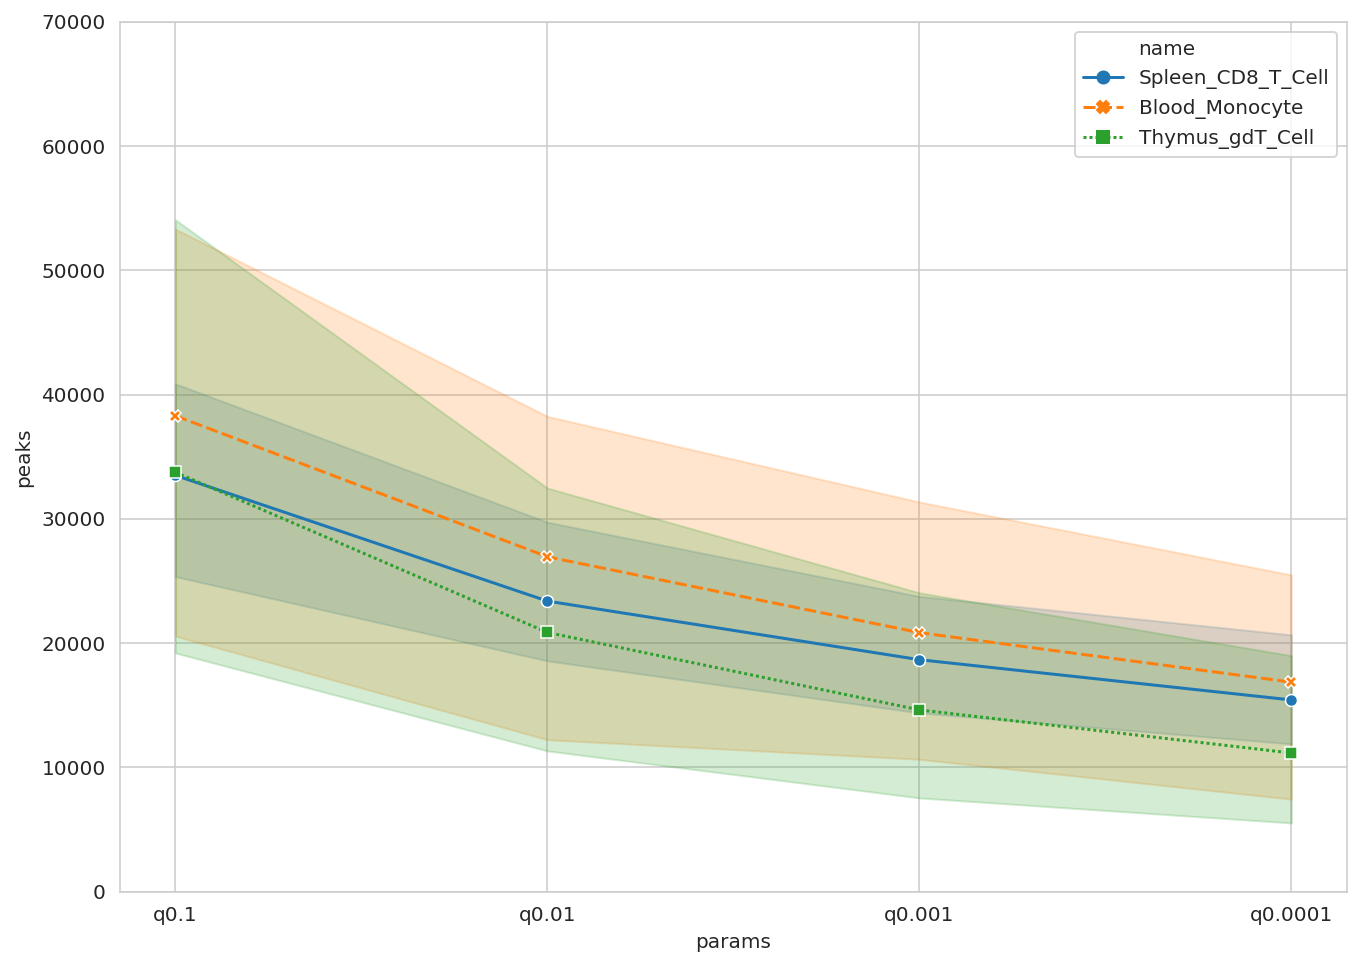

In [5]:
show_peaks(dfm, LEVELS, log=False, ymax=70000)

## Compute overlap MACS2

In [6]:
from pathlib import Path
import downstream.bed_metrics as bm

def overlap_with_name_level(overlaps, n, l):
    dfo = overlaps[(n, l)].melt(value_name='overlap')
    dfo['name'] = n
    dfo['level'] = l
    return dfo


def show_overlap(df, levels, tool, ymax=None):
    overlaps = {}
    for n in NAMES:
        for l in levels:
            print('Processing', n, l)
            files = df.loc[np.logical_and(df['name'] == n, df['level'] == l)]['file']
            paths = [Path(f) for f in files]
            df_path = '/tmp/overlap_{}_{}_{}.tsv'.format(tool, n, l)
            overlaps[(n, l)] = bm.load_or_build_metrics_table(paths, paths, Path(df_path), jaccard=False)

    dfoverlap = pd.concat([overlap_with_name_level(overlaps, n, l) for (n, l) in overlaps])        
    dfoverlap.head()

    level_ranks = {l:i for i,l in enumerate(levels)}  
    dfoverlap['params'] = dfoverlap['level'].map(level_ranks)
    dfoverlap.sort_values(['params'], inplace=True)
    print([(l,i) for i,l in enumerate(levels)])

    # Plot overlaps
    plt.figure(figsize=(11, 8))
    g = sns.lineplot(x="params", y="overlap",
                 hue="name", markers=True, style="name", ci=100, 
                 data=dfoverlap)
    g.set(ylim=(0, ymax))
    g.set(xticks=np.arange(0,len(level_ranks)))
    g.set(xticklabels=levels)
    plt.show()
    # now drop the 'params' column
    dfoverlap.drop(labels=['params'], axis=1, inplace=True)

Processing Thymus_gdT_Cell q0.1
[Skipped]: Already exists /tmp/overlap_macs2_Thymus_gdT_Cell_q0.1.tsv
Processing Thymus_gdT_Cell q0.01
[Skipped]: Already exists /tmp/overlap_macs2_Thymus_gdT_Cell_q0.01.tsv
Processing Thymus_gdT_Cell q0.001
[Skipped]: Already exists /tmp/overlap_macs2_Thymus_gdT_Cell_q0.001.tsv
Processing Thymus_gdT_Cell q0.0001
[Skipped]: Already exists /tmp/overlap_macs2_Thymus_gdT_Cell_q0.0001.tsv
Processing Spleen_CD8_T_Cell q0.1
[Skipped]: Already exists /tmp/overlap_macs2_Spleen_CD8_T_Cell_q0.1.tsv
Processing Spleen_CD8_T_Cell q0.01
[Skipped]: Already exists /tmp/overlap_macs2_Spleen_CD8_T_Cell_q0.01.tsv
Processing Spleen_CD8_T_Cell q0.001
[Skipped]: Already exists /tmp/overlap_macs2_Spleen_CD8_T_Cell_q0.001.tsv
Processing Spleen_CD8_T_Cell q0.0001
[Skipped]: Already exists /tmp/overlap_macs2_Spleen_CD8_T_Cell_q0.0001.tsv
Processing Blood_Monocyte q0.1
[Skipped]: Already exists /tmp/overlap_macs2_Blood_Monocyte_q0.1.tsv
Processing Blood_Monocyte q0.01
[Skipped]: A

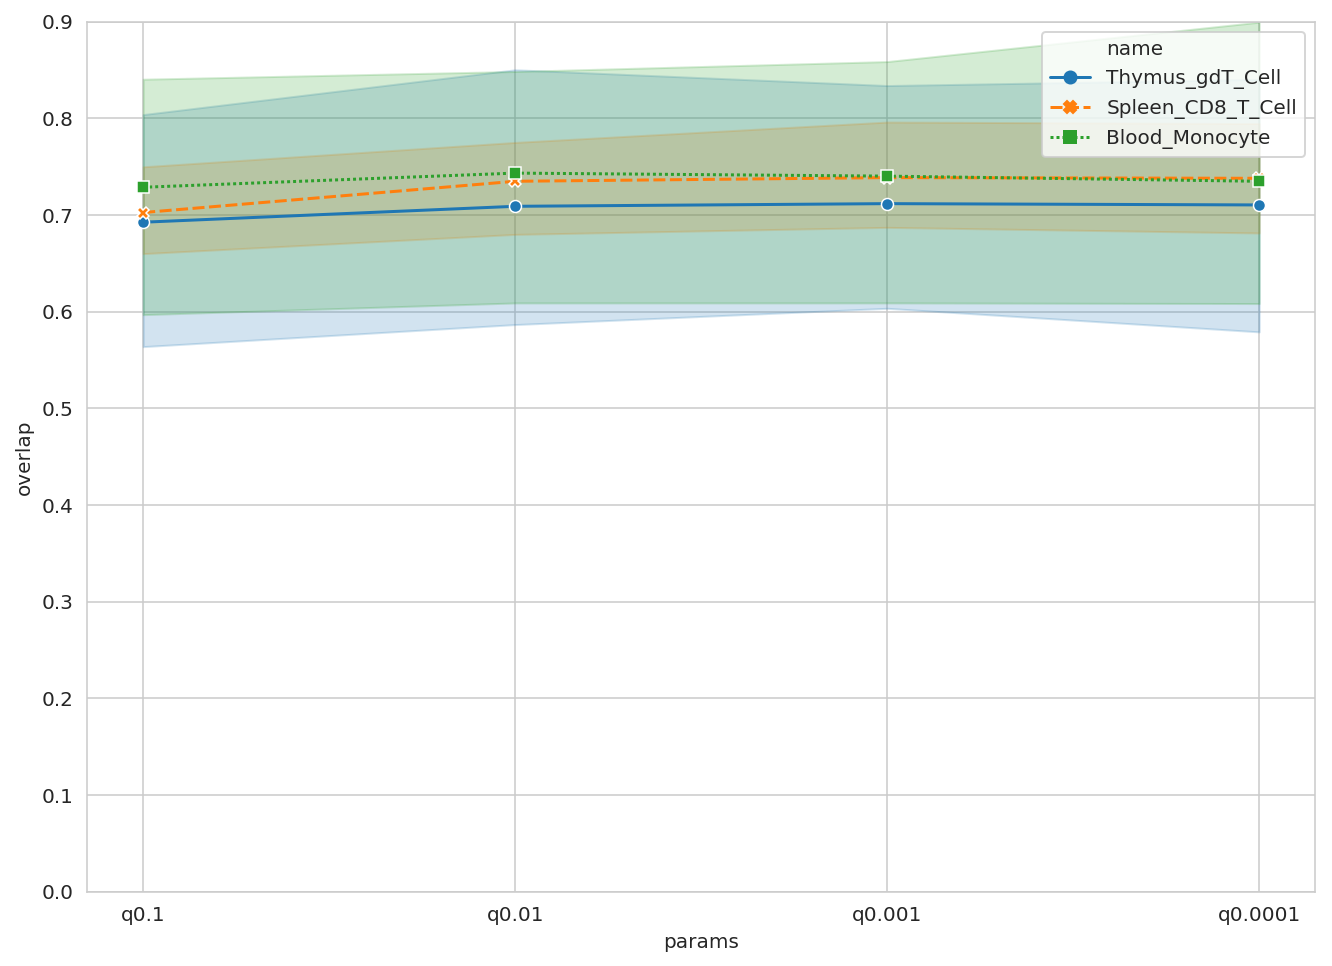

In [7]:
show_overlap(dfm, LEVELS, 'macs2', ymax=0.9)

# SPAN

In [8]:
import subprocess
import re
from pybedtools import BedTool

SPAN_FOLDER='/mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span'
FDRS = [0.1, 0.01, 0.001, 0.0001]
BINS = [200, 100, 50]
SPAN_JAR = '/mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/span-0.9.2.4618.jar'
CHROM_SIZES = '/mnt/stripe/bio/genomes/mm10/mm10.chrom.sizes'

dfs = pd.DataFrame(columns=['name', 'bin', 'level', 'file', 'peaks'])

# Process different bin/fdr values to estimate peaks numbers
for bin_size in BINS:
    for file in glob.glob(SPAN_FOLDER + '/*.bam'):
        name = next((n for n in NAMES if n in file), None)
        fid = re.sub('\.bam|.*/', '', file)
        for fdr in FDRS:
            print('Processing', file, name, bin_size, fdr)
            peaks_file = next(iter(glob.glob(SPAN_FOLDER + 
                                             '/*{}*_{}*_{}*.peak*'.format(fid, bin_size, fdr))), None)
            if peaks_file:
                print('Peaks file', peaks_file)
            else:
                peaks_file = '{}/{}_{}_{}_5.peak'.format(SPAN_FOLDER, fid, bin_size, fdr)
                command = 'java -jar {} '.format(SPAN_JAR) + \
                'analyze -t {} --chrom.sizes {} --bin {} --fdr {} --gap 5 --peaks {} '.format(
                    file, CHROM_SIZES, bin_size, fdr, peaks_file) + \
                '--workdir {} --threads 8'.format(SPAN_FOLDER)
                print('Running', command)
                subprocess.run(command, shell=True, check=True)
                print('Peaks file', peaks_file)
            dfs.loc[len(dfs)] = (name, bin_size, fdr, peaks_file, int(BedTool(peaks_file).count()))
                
display(dfs.head())

Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692210_Thymus_gdT_Cell_ATAC_seq_mm10.bam Thymus_gdT_Cell 200 0.1
Peaks file /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692210_Thymus_gdT_Cell_ATAC_seq_mm10_200_0.1_5.peak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692210_Thymus_gdT_Cell_ATAC_seq_mm10.bam Thymus_gdT_Cell 200 0.01
Peaks file /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692210_Thymus_gdT_Cell_ATAC_seq_mm10_200_0.01_5.peak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692210_Thymus_gdT_Cell_ATAC_seq_mm10.bam Thymus_gdT_Cell 200 0.001
Peaks file /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692210_Thymus_gdT_Cell_ATAC_seq_mm10_200_0.001_5.peak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692210_Thymus_gdT_Cell_ATAC_seq_mm10.bam Thymus_gdT_Cell 200 0.0001
P

Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692223_Spleen_CD8_T_Cell_ATAC_seq_mm10.bam Spleen_CD8_T_Cell 200 0.01
Peaks file /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692223_Spleen_CD8_T_Cell_ATAC_seq_mm10_200_0.01_5.peak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692223_Spleen_CD8_T_Cell_ATAC_seq_mm10.bam Spleen_CD8_T_Cell 200 0.001
Peaks file /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692223_Spleen_CD8_T_Cell_ATAC_seq_mm10_200_0.001_5.peak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692223_Spleen_CD8_T_Cell_ATAC_seq_mm10.bam Spleen_CD8_T_Cell 200 0.0001
Peaks file /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692223_Spleen_CD8_T_Cell_ATAC_seq_mm10_200_0.0001_5.peak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692224_Spleen_CD8_T_Cell_ATAC_seq_mm10.bam Sp

Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692230_Spleen_CD8_T_Cell_ATAC_seq_mm10.bam Spleen_CD8_T_Cell 200 0.001
Peaks file /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692230_Spleen_CD8_T_Cell_ATAC_seq_mm10_200_0.001_5.peak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692230_Spleen_CD8_T_Cell_ATAC_seq_mm10.bam Spleen_CD8_T_Cell 200 0.0001
Peaks file /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692230_Spleen_CD8_T_Cell_ATAC_seq_mm10_200_0.0001_5.peak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692231_Spleen_CD8_T_Cell_ATAC_seq_mm10.bam Spleen_CD8_T_Cell 200 0.1
Peaks file /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692231_Spleen_CD8_T_Cell_ATAC_seq_mm10_200_0.1_5.peak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692231_Spleen_CD8_T_Cell_ATAC_seq_mm10.bam Sple

Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692330_Blood_Monocyte_ATAC_seq_mm10.bam Blood_Monocyte 200 0.0001
Peaks file /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692330_Blood_Monocyte_ATAC_seq_mm10_200_0.0001_5.peak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692210_Thymus_gdT_Cell_ATAC_seq_mm10.bam Thymus_gdT_Cell 100 0.1
Peaks file /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692210_Thymus_gdT_Cell_ATAC_seq_mm10_100_0.1_5.peak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692210_Thymus_gdT_Cell_ATAC_seq_mm10.bam Thymus_gdT_Cell 100 0.01
Peaks file /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692210_Thymus_gdT_Cell_ATAC_seq_mm10_100_0.01_5.peak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692210_Thymus_gdT_Cell_ATAC_seq_mm10.bam Thymus_gdT_Cell 100 0.001
Pea

Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692223_Spleen_CD8_T_Cell_ATAC_seq_mm10.bam Spleen_CD8_T_Cell 100 0.1
Peaks file /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692223_Spleen_CD8_T_Cell_ATAC_seq_mm10_100_0.1_5.peak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692223_Spleen_CD8_T_Cell_ATAC_seq_mm10.bam Spleen_CD8_T_Cell 100 0.01
Peaks file /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692223_Spleen_CD8_T_Cell_ATAC_seq_mm10_100_0.01_5.peak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692223_Spleen_CD8_T_Cell_ATAC_seq_mm10.bam Spleen_CD8_T_Cell 100 0.001
Peaks file /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692223_Spleen_CD8_T_Cell_ATAC_seq_mm10_100_0.001_5.peak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692223_Spleen_CD8_T_Cell_ATAC_seq_mm10.bam Spleen_C

Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692230_Spleen_CD8_T_Cell_ATAC_seq_mm10.bam Spleen_CD8_T_Cell 100 0.01
Peaks file /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692230_Spleen_CD8_T_Cell_ATAC_seq_mm10_100_0.01_5.peak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692230_Spleen_CD8_T_Cell_ATAC_seq_mm10.bam Spleen_CD8_T_Cell 100 0.001
Peaks file /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692230_Spleen_CD8_T_Cell_ATAC_seq_mm10_100_0.001_5.peak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692230_Spleen_CD8_T_Cell_ATAC_seq_mm10.bam Spleen_CD8_T_Cell 100 0.0001
Peaks file /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692230_Spleen_CD8_T_Cell_ATAC_seq_mm10_100_0.0001_5.peak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692231_Spleen_CD8_T_Cell_ATAC_seq_mm10.bam Sp

Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692330_Blood_Monocyte_ATAC_seq_mm10.bam Blood_Monocyte 100 0.001
Peaks file /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692330_Blood_Monocyte_ATAC_seq_mm10_100_0.001_5.peak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692330_Blood_Monocyte_ATAC_seq_mm10.bam Blood_Monocyte 100 0.0001
Peaks file /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692330_Blood_Monocyte_ATAC_seq_mm10_100_0.0001_5.peak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692210_Thymus_gdT_Cell_ATAC_seq_mm10.bam Thymus_gdT_Cell 50 0.1
Peaks file /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692210_Thymus_gdT_Cell_ATAC_seq_mm10_50_0.1_5.peak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692210_Thymus_gdT_Cell_ATAC_seq_mm10.bam Thymus_gdT_Cell 50 0.01
Peaks fi

Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692222_Spleen_CD8_T_Cell_ATAC_seq_mm10.bam Spleen_CD8_T_Cell 50 0.0001
Peaks file /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692222_Spleen_CD8_T_Cell_ATAC_seq_mm10_50_0.0001_5.peak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692223_Spleen_CD8_T_Cell_ATAC_seq_mm10.bam Spleen_CD8_T_Cell 50 0.1
Peaks file /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692223_Spleen_CD8_T_Cell_ATAC_seq_mm10_50_0.1_5.peak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692223_Spleen_CD8_T_Cell_ATAC_seq_mm10.bam Spleen_CD8_T_Cell 50 0.01
Peaks file /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692223_Spleen_CD8_T_Cell_ATAC_seq_mm10_50_0.01_5.peak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692223_Spleen_CD8_T_Cell_ATAC_seq_mm10.bam Spleen_CD8_T

Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692230_Spleen_CD8_T_Cell_ATAC_seq_mm10.bam Spleen_CD8_T_Cell 50 0.1
Peaks file /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692230_Spleen_CD8_T_Cell_ATAC_seq_mm10_50_0.1_5.peak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692230_Spleen_CD8_T_Cell_ATAC_seq_mm10.bam Spleen_CD8_T_Cell 50 0.01
Peaks file /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692230_Spleen_CD8_T_Cell_ATAC_seq_mm10_50_0.01_5.peak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692230_Spleen_CD8_T_Cell_ATAC_seq_mm10.bam Spleen_CD8_T_Cell 50 0.001
Peaks file /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692230_Spleen_CD8_T_Cell_ATAC_seq_mm10_50_0.001_5.peak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692230_Spleen_CD8_T_Cell_ATAC_seq_mm10.bam Spleen_CD8_T_C

Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692330_Blood_Monocyte_ATAC_seq_mm10.bam Blood_Monocyte 50 0.001
Peaks file /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692330_Blood_Monocyte_ATAC_seq_mm10_50_0.001_5.peak
Processing /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692330_Blood_Monocyte_ATAC_seq_mm10.bam Blood_Monocyte 50 0.0001
Peaks file /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span/GSM2692330_Blood_Monocyte_ATAC_seq_mm10_50_0.0001_5.peak


,name,bin,level,file,peaks
0,Thymus_gdT_Cell,200,0.1000,/mnt/stripe/bio/raw-data/geo-samples/PRJNA3929...,39522
1,Thymus_gdT_Cell,200,0.0100,/mnt/stripe/bio/raw-data/geo-samples/PRJNA3929...,31332
2,Thymus_gdT_Cell,200,0.0010,/mnt/stripe/bio/raw-data/geo-samples/PRJNA3929...,26960
3,Thymus_gdT_Cell,200,0.0001,/mnt/stripe/bio/raw-data/geo-samples/PRJNA3929...,23473
4,Thymus_gdT_Cell,200,0.1000,/mnt/stripe/bio/raw-data/geo-samples/PRJNA3929...,46768


In [9]:
dfs['peaks'] = [int(x) for x in dfs['peaks']]
dfs.groupby(['name', 'bin', 'level'])['peaks'].mean()

name               bin  level 
Blood_Monocyte     50   0.0001    29420.833333
                        0.0010    32383.333333
                        0.0100    36162.500000
                        0.1000    43391.166667
                   100  0.0001    26504.500000
                        0.0010    29157.666667
                        0.0100    32504.500000
                        0.1000    38013.166667
                   200  0.0001    24037.333333
                        0.0010    26518.833333
                        0.0100    29672.833333
                        0.1000    30984.500000
Spleen_CD8_T_Cell  50   0.0001    26122.800000
                        0.0010    28196.700000
                        0.0100    30875.100000
                        0.1000    36426.400000
                   100  0.0001    23823.500000
                        0.0010    25845.100000
                        0.0100    28469.600000
                        0.1000    33652.700000
                   200  0.000

## SPAN number of peaks

Bin Size 200
[(0.1, 0), (0.01, 1), (0.001, 2), (0.0001, 3)]


/home/user/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/user/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


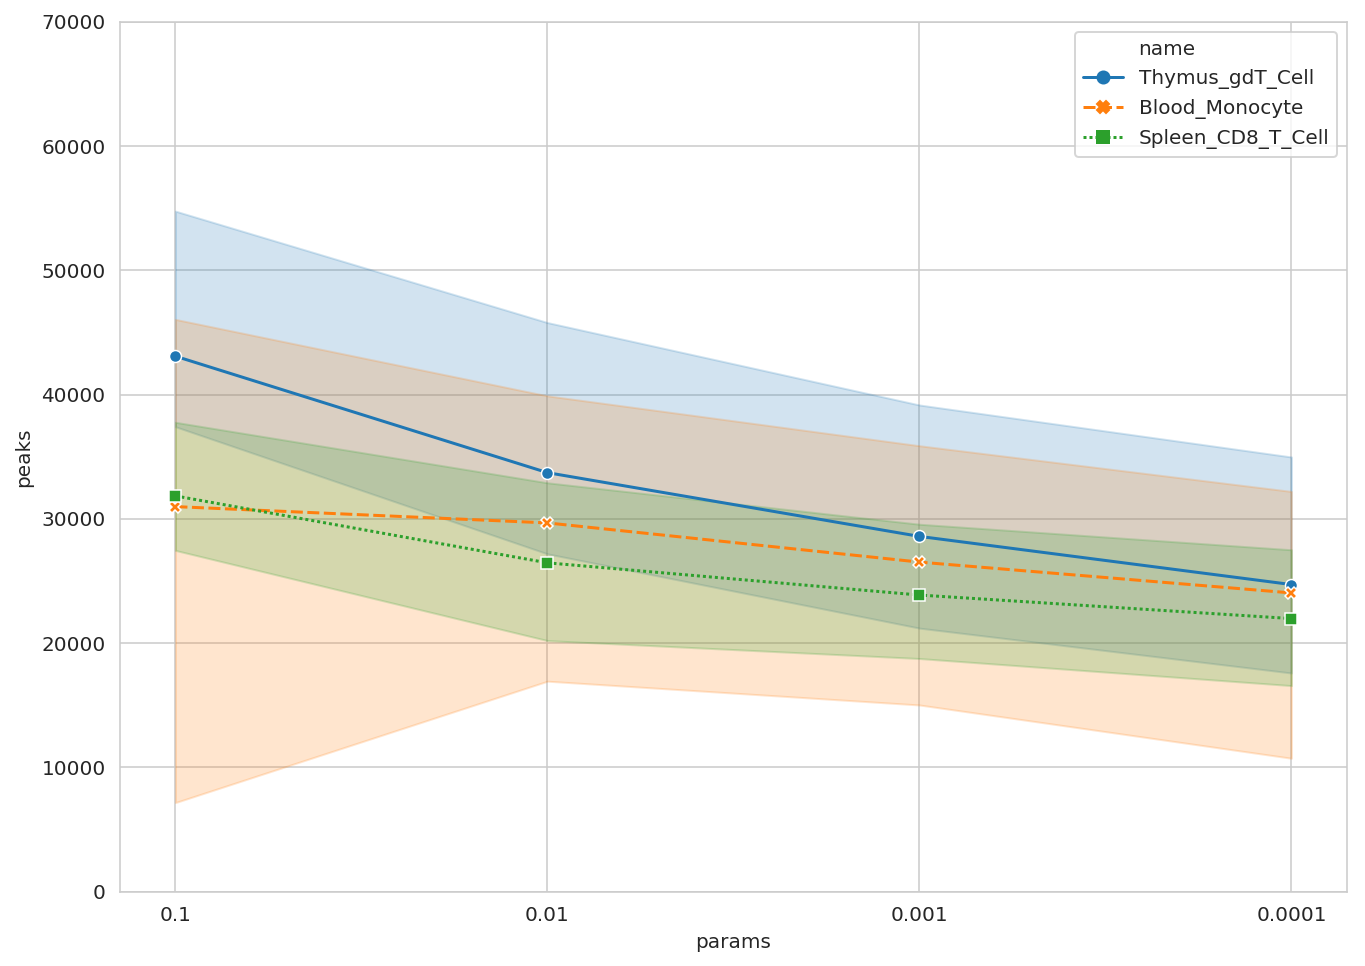

/home/user/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Bin Size 100
[(0.1, 0), (0.01, 1), (0.001, 2), (0.0001, 3)]


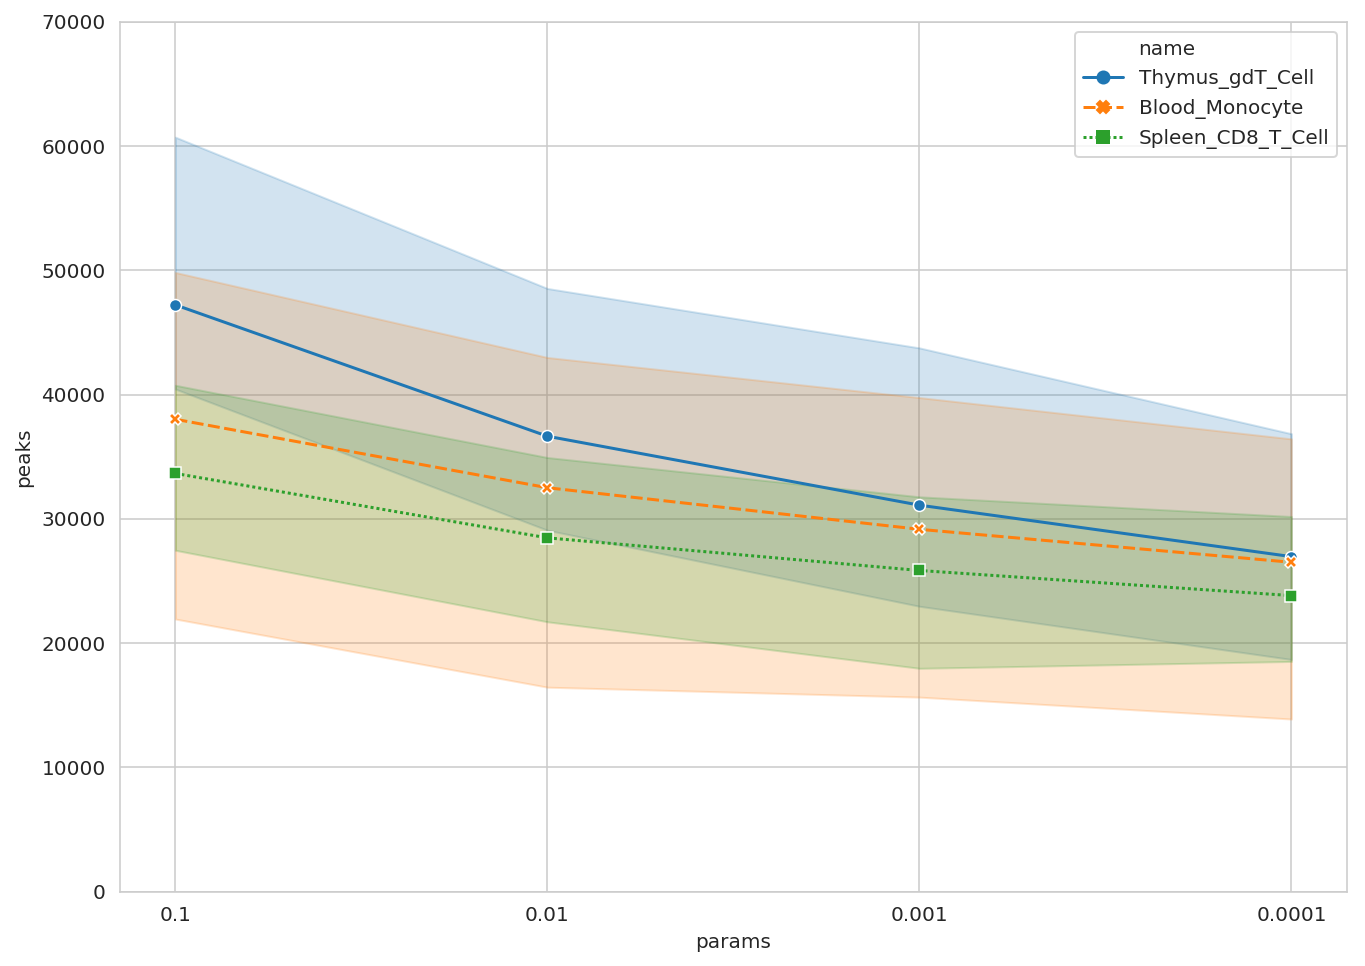

Bin Size 50
[(0.1, 0), (0.01, 1), (0.001, 2), (0.0001, 3)]


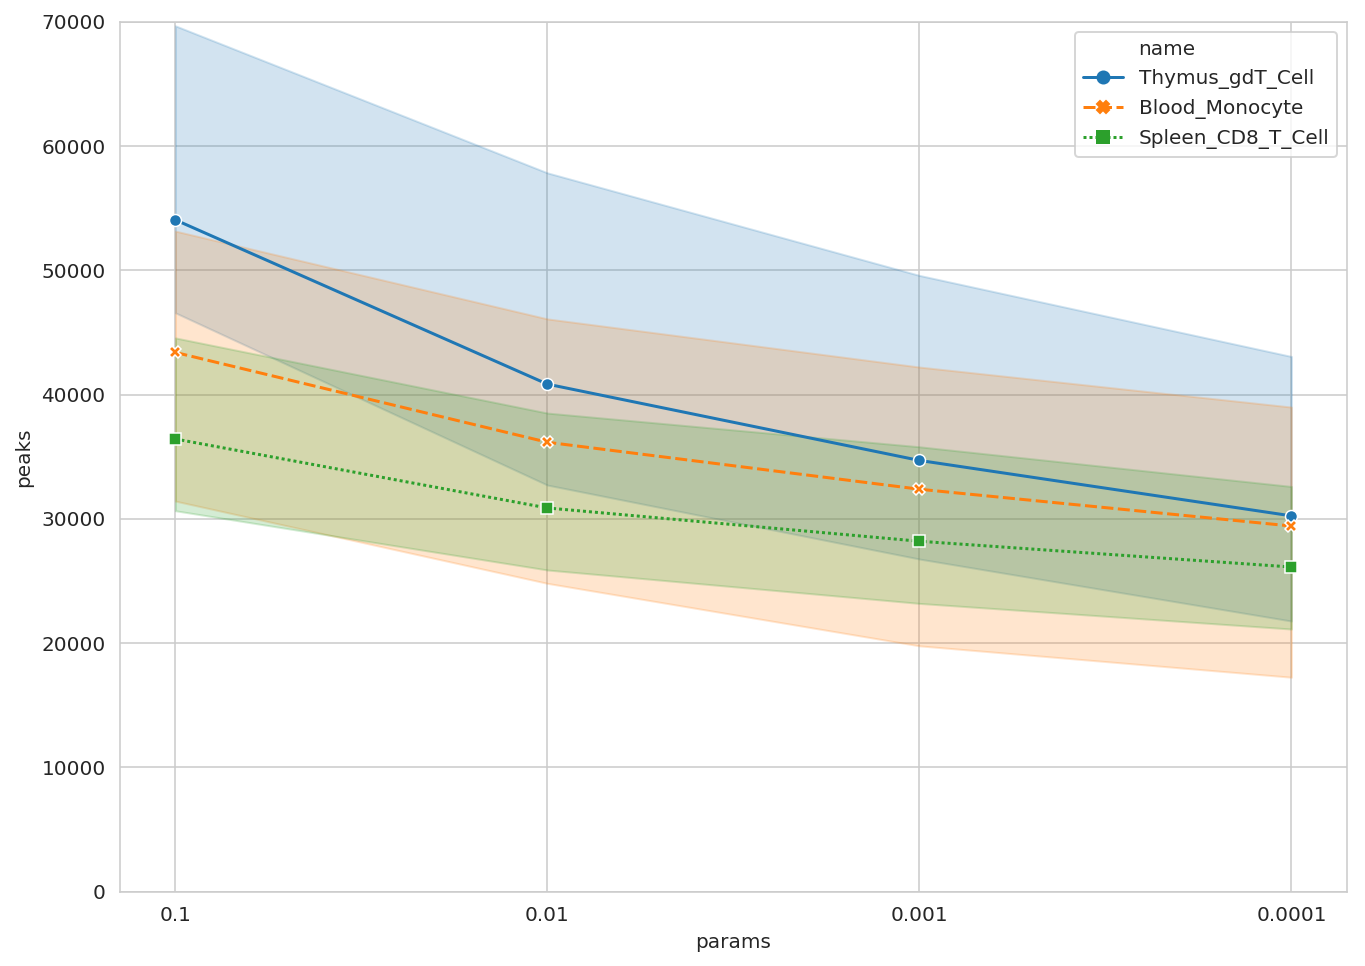

In [10]:
for bin_size in BINS:
    print('Bin Size', bin_size)
    show_peaks(dfs.loc[dfs['bin']==bin_size], FDRS, log=False, ymax=70000)

## SPAN overlaps

Bin Size 200
Processing Thymus_gdT_Cell 0.1
[Skipped]: Already exists /tmp/overlap_span_200_Thymus_gdT_Cell_0.1.tsv
Processing Thymus_gdT_Cell 0.01
[Skipped]: Already exists /tmp/overlap_span_200_Thymus_gdT_Cell_0.01.tsv
Processing Thymus_gdT_Cell 0.001
[Skipped]: Already exists /tmp/overlap_span_200_Thymus_gdT_Cell_0.001.tsv
Processing Thymus_gdT_Cell 0.0001
[Skipped]: Already exists /tmp/overlap_span_200_Thymus_gdT_Cell_0.0001.tsv
Processing Spleen_CD8_T_Cell 0.1
[Skipped]: Already exists /tmp/overlap_span_200_Spleen_CD8_T_Cell_0.1.tsv
Processing Spleen_CD8_T_Cell 0.01
[Skipped]: Already exists /tmp/overlap_span_200_Spleen_CD8_T_Cell_0.01.tsv
Processing Spleen_CD8_T_Cell 0.001
[Skipped]: Already exists /tmp/overlap_span_200_Spleen_CD8_T_Cell_0.001.tsv
Processing Spleen_CD8_T_Cell 0.0001
[Skipped]: Already exists /tmp/overlap_span_200_Spleen_CD8_T_Cell_0.0001.tsv
Processing Blood_Monocyte 0.1
[Skipped]: Already exists /tmp/overlap_span_200_Blood_Monocyte_0.1.tsv
Processing Blood_Monoc

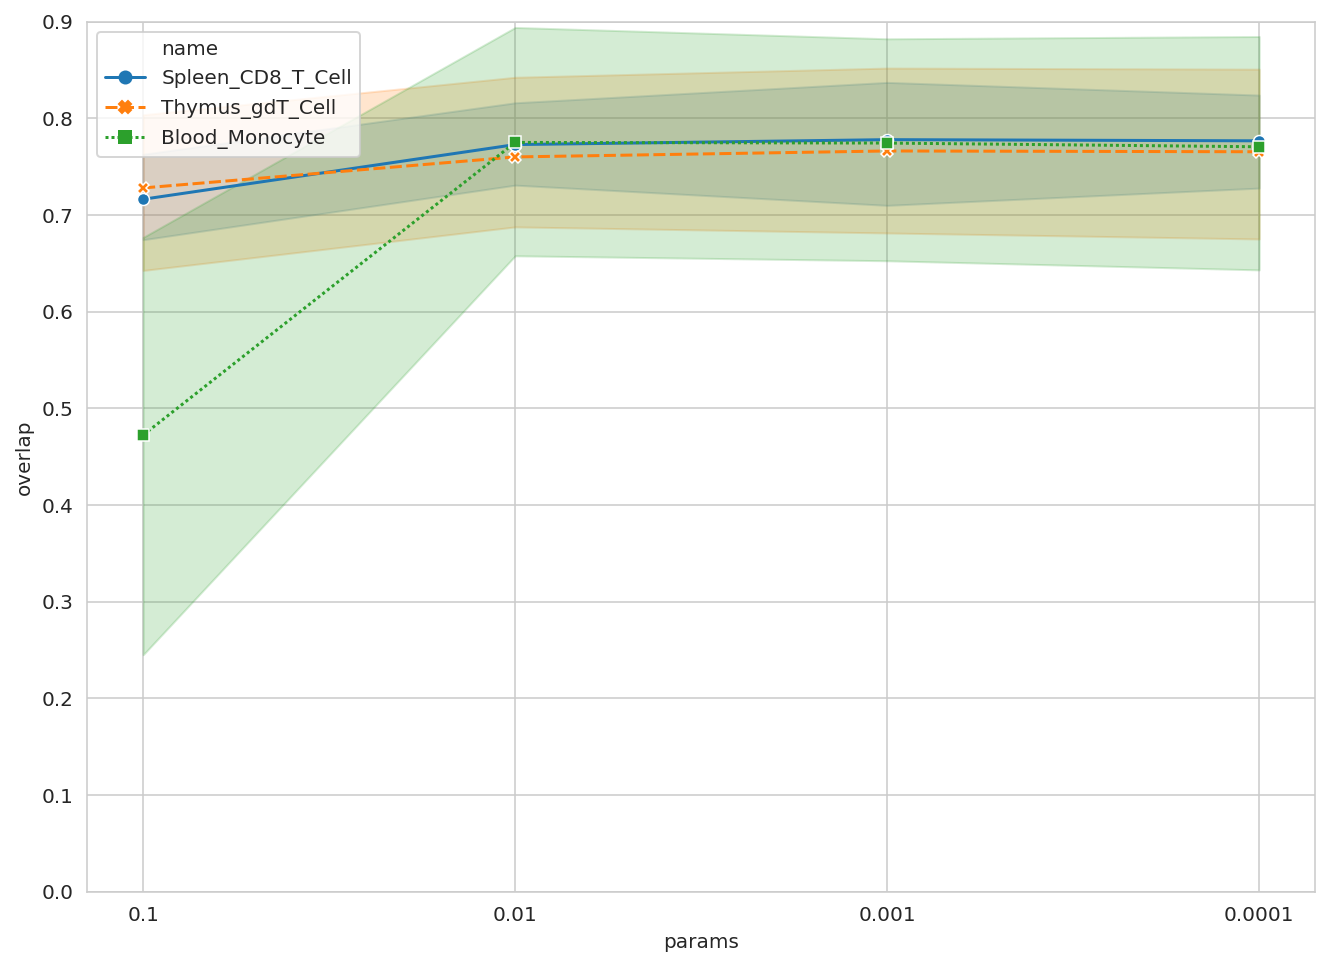

Bin Size 100
Processing Thymus_gdT_Cell 0.1
[Skipped]: Already exists /tmp/overlap_span_100_Thymus_gdT_Cell_0.1.tsv
Processing Thymus_gdT_Cell 0.01
[Skipped]: Already exists /tmp/overlap_span_100_Thymus_gdT_Cell_0.01.tsv
Processing Thymus_gdT_Cell 0.001
[Skipped]: Already exists /tmp/overlap_span_100_Thymus_gdT_Cell_0.001.tsv
Processing Thymus_gdT_Cell 0.0001
[Skipped]: Already exists /tmp/overlap_span_100_Thymus_gdT_Cell_0.0001.tsv
Processing Spleen_CD8_T_Cell 0.1
[Skipped]: Already exists /tmp/overlap_span_100_Spleen_CD8_T_Cell_0.1.tsv
Processing Spleen_CD8_T_Cell 0.01
[Skipped]: Already exists /tmp/overlap_span_100_Spleen_CD8_T_Cell_0.01.tsv
Processing Spleen_CD8_T_Cell 0.001
[Skipped]: Already exists /tmp/overlap_span_100_Spleen_CD8_T_Cell_0.001.tsv
Processing Spleen_CD8_T_Cell 0.0001
[Skipped]: Already exists /tmp/overlap_span_100_Spleen_CD8_T_Cell_0.0001.tsv
Processing Blood_Monocyte 0.1
[Skipped]: Already exists /tmp/overlap_span_100_Blood_Monocyte_0.1.tsv
Processing Blood_Monoc

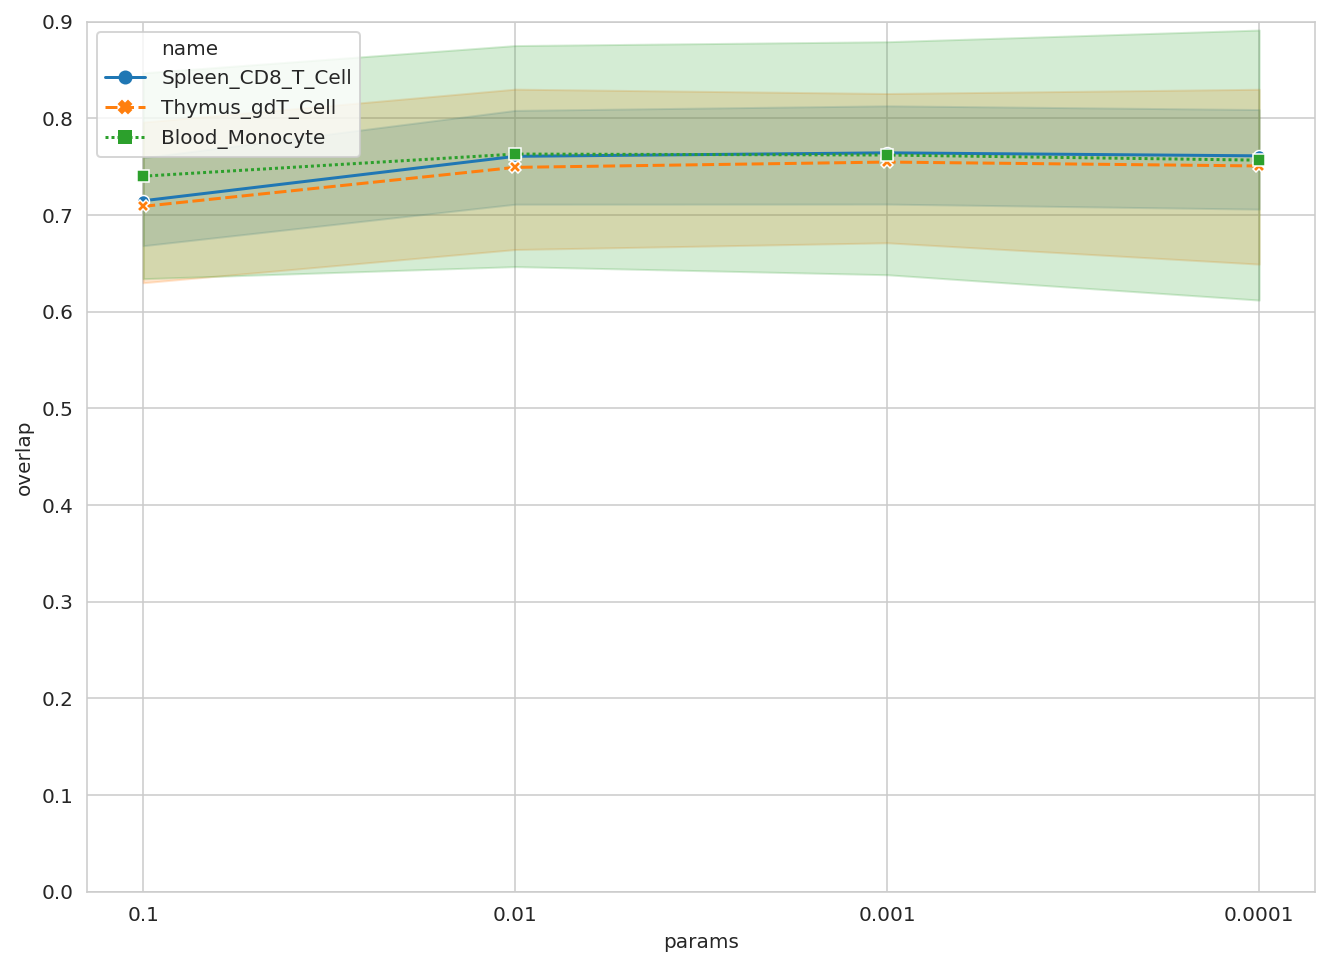

Bin Size 50
Processing Thymus_gdT_Cell 0.1
[Skipped]: Already exists /tmp/overlap_span_50_Thymus_gdT_Cell_0.1.tsv
Processing Thymus_gdT_Cell 0.01
[Skipped]: Already exists /tmp/overlap_span_50_Thymus_gdT_Cell_0.01.tsv
Processing Thymus_gdT_Cell 0.001
[Skipped]: Already exists /tmp/overlap_span_50_Thymus_gdT_Cell_0.001.tsv
Processing Thymus_gdT_Cell 0.0001
[Skipped]: Already exists /tmp/overlap_span_50_Thymus_gdT_Cell_0.0001.tsv
Processing Spleen_CD8_T_Cell 0.1
[Skipped]: Already exists /tmp/overlap_span_50_Spleen_CD8_T_Cell_0.1.tsv
Processing Spleen_CD8_T_Cell 0.01
[Skipped]: Already exists /tmp/overlap_span_50_Spleen_CD8_T_Cell_0.01.tsv
Processing Spleen_CD8_T_Cell 0.001
[Skipped]: Already exists /tmp/overlap_span_50_Spleen_CD8_T_Cell_0.001.tsv
Processing Spleen_CD8_T_Cell 0.0001
[Skipped]: Already exists /tmp/overlap_span_50_Spleen_CD8_T_Cell_0.0001.tsv
Processing Blood_Monocyte 0.1
[Skipped]: Already exists /tmp/overlap_span_50_Blood_Monocyte_0.1.tsv
Processing Blood_Monocyte 0.01
[

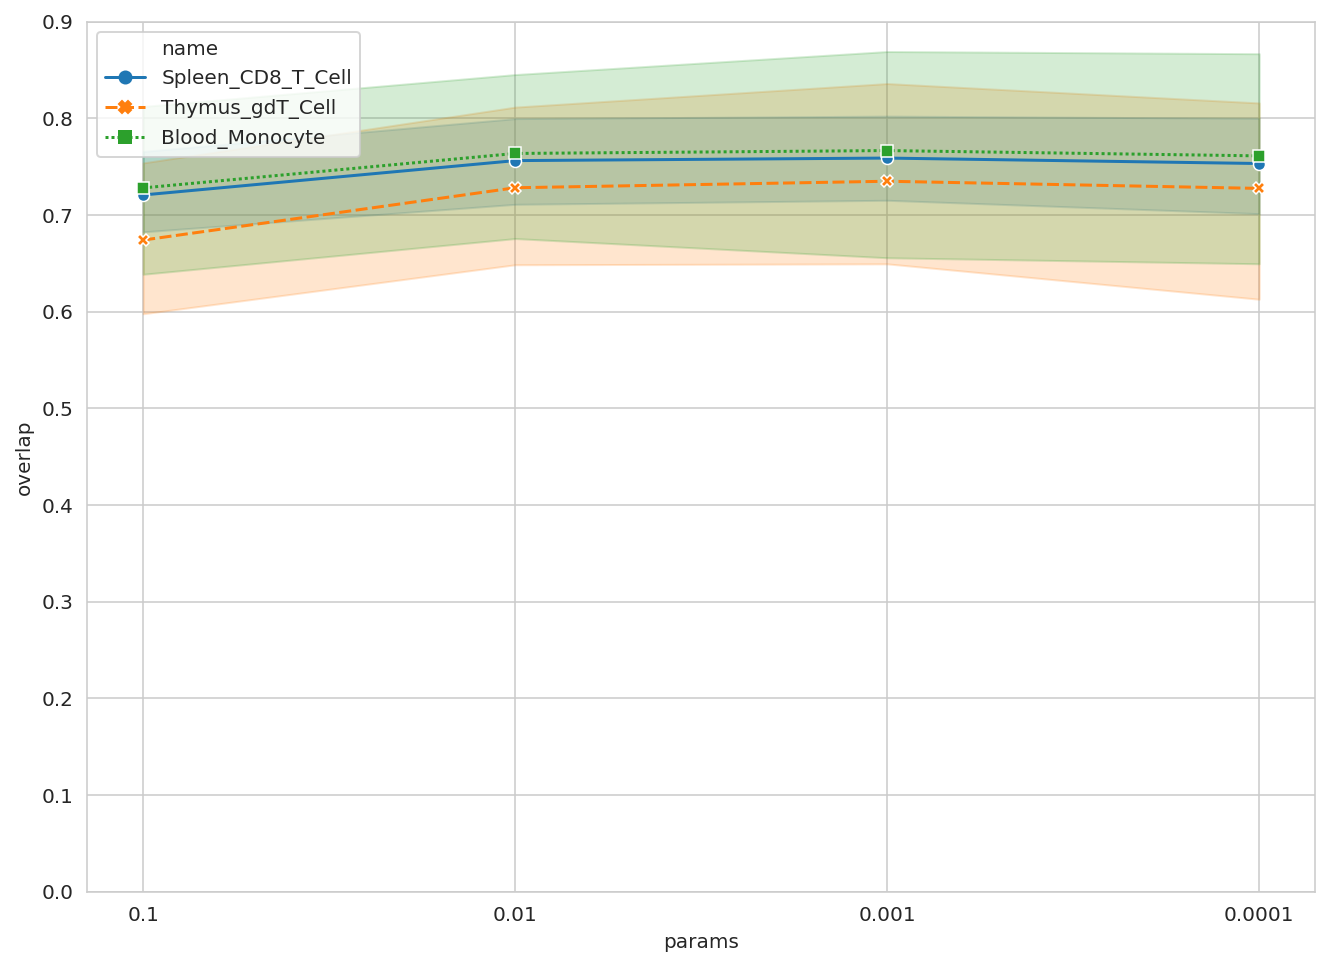

In [11]:
for bin_size in BINS:
    print('Bin Size', bin_size)
    show_overlap(dfs.loc[dfs['bin']==bin_size], FDRS, 'span_{}'.format(bin_size), ymax=0.9)

## SPAN tuned with BIN_SIZE=100, 50

In [12]:
dfm_best = dfm.loc[dfm['level']=='q0.01'].copy()
dfm_best['level'] = 'macs2_q0.01'

dfs200_best = dfs.loc[np.logical_and(dfs['bin']==200, dfs['level']==0.01)][[c for c in dfs.columns if c != 'bin']].copy()
dfs200_best['level'] = 'span_200_q0.01'

dfs100_best = dfs.loc[np.logical_and(dfs['bin']==100, dfs['level']==0.01)][[c for c in dfs.columns if c != 'bin']].copy()
dfs100_best['level'] = 'span_100_q0.01'

dfs50_best = dfs.loc[np.logical_and(dfs['bin']==50, dfs['level']==0.01)][[c for c in dfs.columns if c != 'bin']].copy()
dfs50_best['level'] = 'span_50_q0.01'       

# Process SPAN tuned values to estimate peaks numbers
SPAN_200_TUNED='/mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span_200_tuned'
dfs200_tuned = pd.DataFrame(columns=['name', 'level', 'file', 'peaks'])
for peaks_file in glob.glob(SPAN_200_TUNED + '/*.peak'):
    name = file_to_name(peaks_file)
    print('Loading peaks', name, peaks_file)
    dfs200_tuned.loc[len(dfs200_tuned)] = (name, 'span_200_tuned', peaks_file, BedTool(peaks_file).count())

SPAN_100_TUNED='/mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span_100_tuned'
dfs100_tuned = pd.DataFrame(columns=['name', 'level', 'file', 'peaks'])
for peaks_file in glob.glob(SPAN_100_TUNED + '/*.peak'):
    name = file_to_name(peaks_file)
    print('Loading peaks', name, peaks_file)
    dfs100_tuned.loc[len(dfs100_tuned)] = (name, 'span_100_tuned', peaks_file, BedTool(peaks_file).count())

SPAN_50_TUNED='/mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span_50_tuned'    
dfs50_tuned = pd.DataFrame(columns=['name', 'level', 'file', 'peaks'])
for peaks_file in glob.glob(SPAN_50_TUNED + '/*.peak'):
    name = file_to_name(peaks_file)
    print('Loading peaks', name, peaks_file)
    dfs50_tuned.loc[len(dfs50_tuned)] = (name, 'span_50_tuned', peaks_file, BedTool(peaks_file).count())

df_best = pd.concat([dfm_best, dfs200_best, dfs200_tuned, dfs100_best, dfs100_tuned, dfs50_best, dfs50_tuned])
df_best['peaks'] = [int(x) for x in df_best['peaks']]
    
BEST_LEVELS=sorted(list(set(df_best['level'])))

Loading peaks Thymus_gdT_Cell /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span_200_tuned/GSM2692210_200#116bc_1.0E-8_2.peak
Loading peaks Thymus_gdT_Cell /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span_200_tuned/GSM2692211_200#3d177_1.0E-10_2.peak
Loading peaks Thymus_gdT_Cell /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span_200_tuned/GSM2692212_200#e6836_1.0E-4_2.peak
Loading peaks Thymus_gdT_Cell /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span_200_tuned/GSM2692213_200#82174_1.0E-6_2.peak
Loading peaks Thymus_gdT_Cell /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span_200_tuned/GSM2692214_200#65460_1.0E-4_2.peak
Loading peaks Thymus_gdT_Cell /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span_200_tuned/GSM2692215_200#b8d76_1.0E-8_2.peak
Loading peaks Spleen_CD8_T_Cell /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span_200_tuned/GSM2692222_200#3176a_1.0E-12_2.peak
Lo

Loading peaks Spleen_CD8_T_Cell /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span_50_tuned/GSM2692230_50#0b5fd_0.01_2.peak
Loading peaks Spleen_CD8_T_Cell /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span_50_tuned/GSM2692231_50#d67d6_0.01_2.peak
Loading peaks Blood_Monocyte /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span_50_tuned/GSM2692279_50#06bf4_1.0E-8_2.peak
Loading peaks Blood_Monocyte /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span_50_tuned/GSM2692280_50#b2eff_1.0E-4_2.peak
Loading peaks Blood_Monocyte /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span_50_tuned/GSM2692281_50#16e7c_1.0E-8_2.peak
Loading peaks Blood_Monocyte /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span_50_tuned/GSM2692282_50#8a8ec_1.0E-10_5.peak
Loading peaks Blood_Monocyte /mnt/stripe/bio/raw-data/geo-samples/PRJNA392905/bams2process_span_50_tuned/GSM2692329_50#6c3c2_1.0E-6_2.peak
Loading peaks Blood_Mono

In [13]:
df_best.groupby(['name', 'level'])['peaks'].mean()

name               level         
Blood_Monocyte     macs2_q0.01       26945.333333
                   span_100_q0.01    32504.500000
                   span_100_tuned    19831.000000
                   span_200_q0.01    29672.833333
                   span_200_tuned    16241.833333
                   span_50_q0.01     36162.500000
                   span_50_tuned     25503.666667
Spleen_CD8_T_Cell  macs2_q0.01       23380.000000
                   span_100_q0.01    28469.600000
                   span_100_tuned    20472.500000
                   span_200_q0.01    26459.500000
                   span_200_tuned    17610.500000
                   span_50_q0.01     30875.100000
                   span_50_tuned     23855.800000
Thymus_gdT_Cell    macs2_q0.01       20858.500000
                   span_100_q0.01    36649.000000
                   span_100_tuned    21417.666667
                   span_200_q0.01    33717.333333
                   span_200_tuned    18186.333333
                

[('macs2_q0.01', 0), ('span_100_q0.01', 1), ('span_100_tuned', 2), ('span_200_q0.01', 3), ('span_200_tuned', 4), ('span_50_q0.01', 5), ('span_50_tuned', 6)]


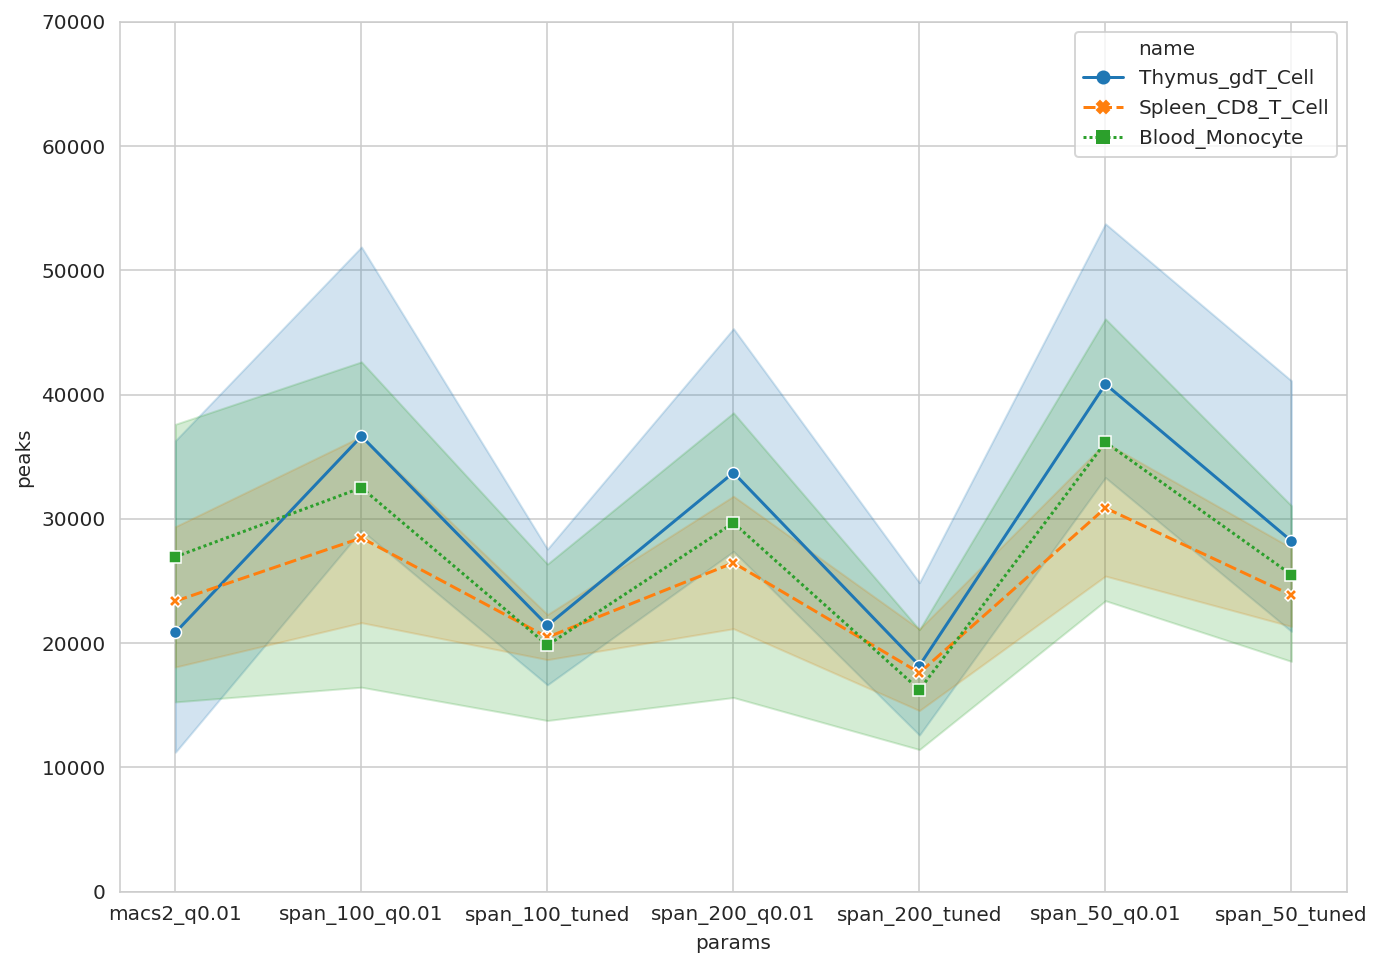

In [14]:
show_peaks(df_best, BEST_LEVELS, log=False, ymax=70000)

In [15]:
%%bash 
rm /tmp/overlap_*

Processing Thymus_gdT_Cell macs2_q0.01
Calculating metrics:  /tmp/overlap_best_Thymus_gdT_Cell_macs2_q0.01.tsv
  [Saved] /tmp/overlap_best_Thymus_gdT_Cell_macs2_q0.01.tsv
Processing Thymus_gdT_Cell span_100_q0.01
Calculating metrics:  /tmp/overlap_best_Thymus_gdT_Cell_span_100_q0.01.tsv
  [Saved] /tmp/overlap_best_Thymus_gdT_Cell_span_100_q0.01.tsv
Processing Thymus_gdT_Cell span_100_tuned
Calculating metrics:  /tmp/overlap_best_Thymus_gdT_Cell_span_100_tuned.tsv
  [Saved] /tmp/overlap_best_Thymus_gdT_Cell_span_100_tuned.tsv
Processing Thymus_gdT_Cell span_200_q0.01
Calculating metrics:  /tmp/overlap_best_Thymus_gdT_Cell_span_200_q0.01.tsv
  [Saved] /tmp/overlap_best_Thymus_gdT_Cell_span_200_q0.01.tsv
Processing Thymus_gdT_Cell span_200_tuned
Calculating metrics:  /tmp/overlap_best_Thymus_gdT_Cell_span_200_tuned.tsv
  [Saved] /tmp/overlap_best_Thymus_gdT_Cell_span_200_tuned.tsv
Processing Thymus_gdT_Cell span_50_q0.01
Calculating metrics:  /tmp/overlap_best_Thymus_gdT_Cell_span_50_q0.0

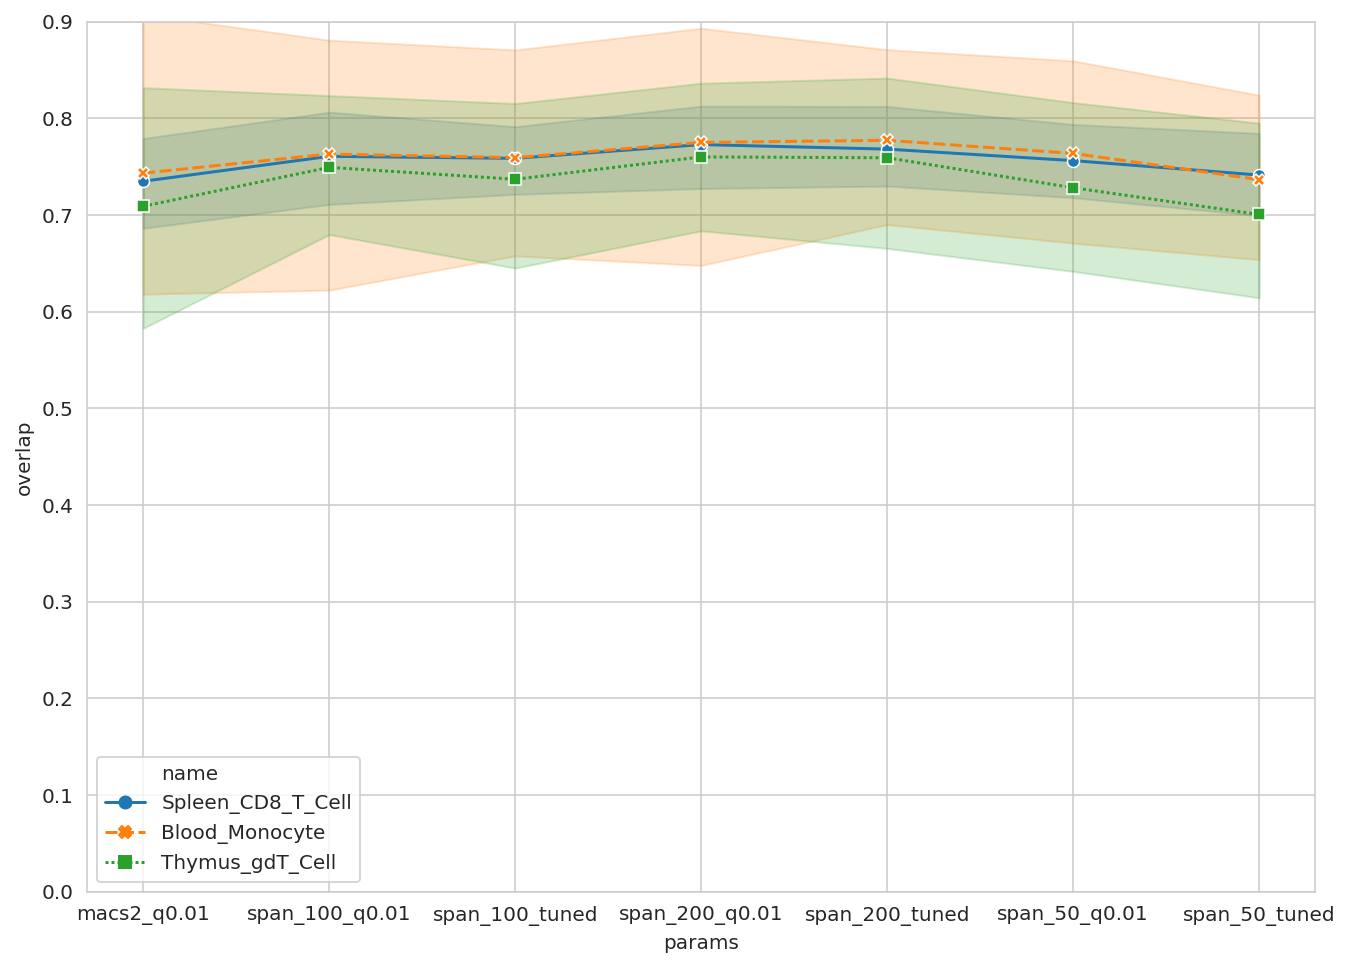

In [16]:
show_overlap(df_best, BEST_LEVELS, 'best', ymax=0.9)

# Different visualization + split by tools

## Number of peaks

In [17]:
NAMES_PALETTE = {'Blood_Monocyte': 'lightblue', 'Spleen_CD8_T_Cell': 'lightgreen', 'Thymus_gdT_Cell': 'orange'}

def plot_peaks2(df, levels, title):
    # Create a copy for inplace modifications
    dfw = df.copy()
    # Column to identify all the possibilities
    dfw['ln'] = dfw['name'] + " " + [str(x) for x in dfw['level']]
    lns = len(set(dfw['ln']))
    axs = {}

    fig = plt.figure(figsize=(int(lns*0.7), 5))
    offset = 0
    for l in levels:
        data = dfw.loc[dfw['level'] == l].sort_values(by=['name'])
        xlabels = []
        for n in data['name']:
            if n not in xlabels:
                xlabels.append(n)
        lnd = len(set(data['ln']))
        ax = plt.subplot2grid((1, lns), (0, offset), colspan=lnd)
        sns.barplot(data=data, 
                 x="name", y='peaks',
                 ci="sd", capsize=.2, errwidth=2,
                palette=NAMES_PALETTE,
                 edgecolor="black",
                 ax = ax)

        sns.swarmplot(data=data,
              x="name", y='peaks',
              size=5,
              color='black',
              ax = ax)
        ax.legend().set_visible(False)
        axs[ax] = plt.ylim()
        if offset > 0:
            ax.get_yaxis().set_ticklabels([])
            ax.set_ylabel('')
        else:
            ax.set_ylabel(title)

        offset += lnd
        ax.set_xlabel('')
        ax.set_title(l)
        plt.xticks(range(0, len(xlabels)), xlabels, rotation=90)

    ymin = np.min([v[0] for v in axs.values()])
    ymax = np.max([v[1] for v in axs.values()])

    for ax in axs.keys():
        ax.set_ylim(bottom = ymin, top = ymax)
    plt.tight_layout()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


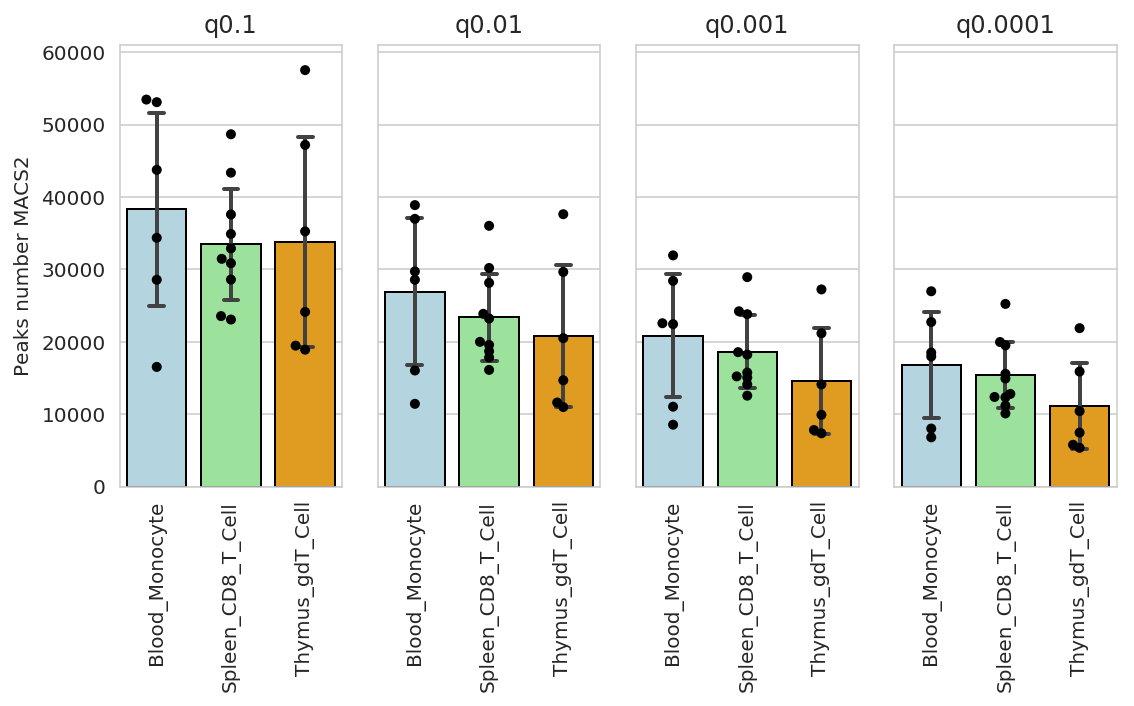

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


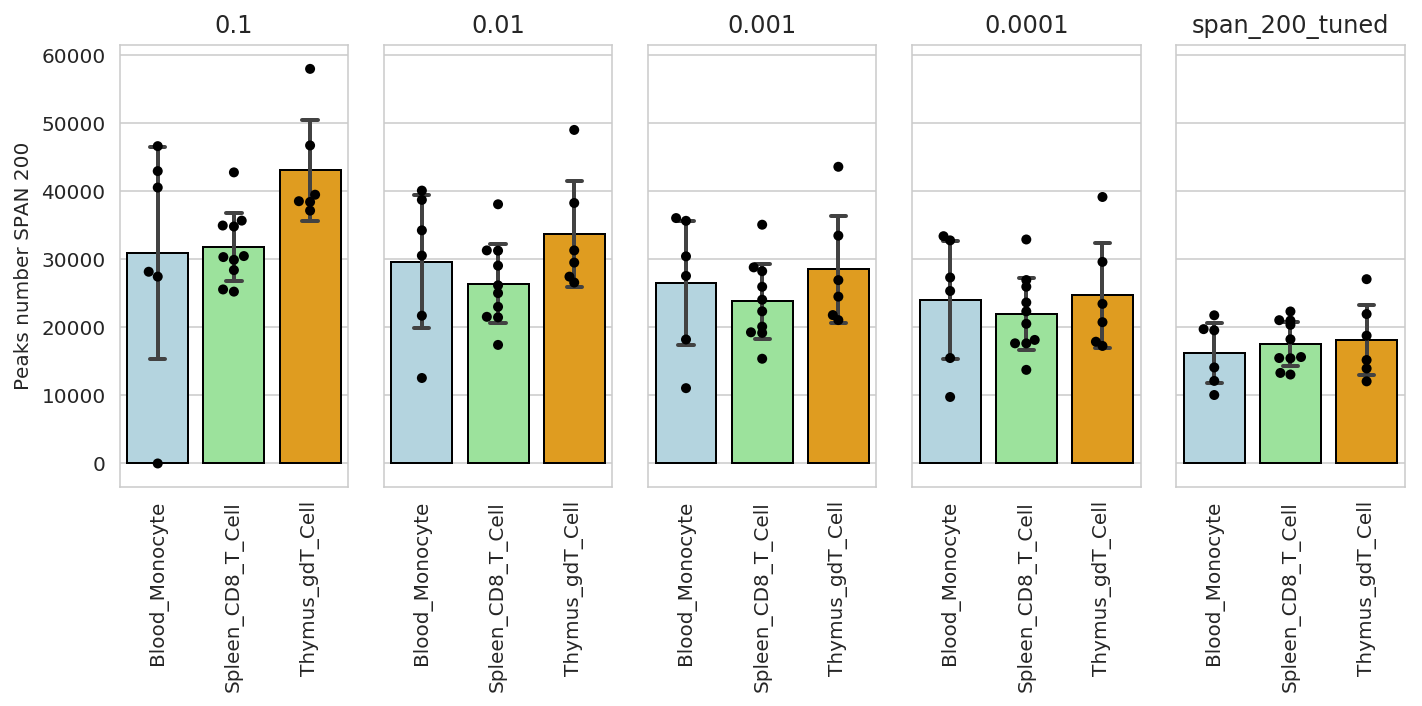

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


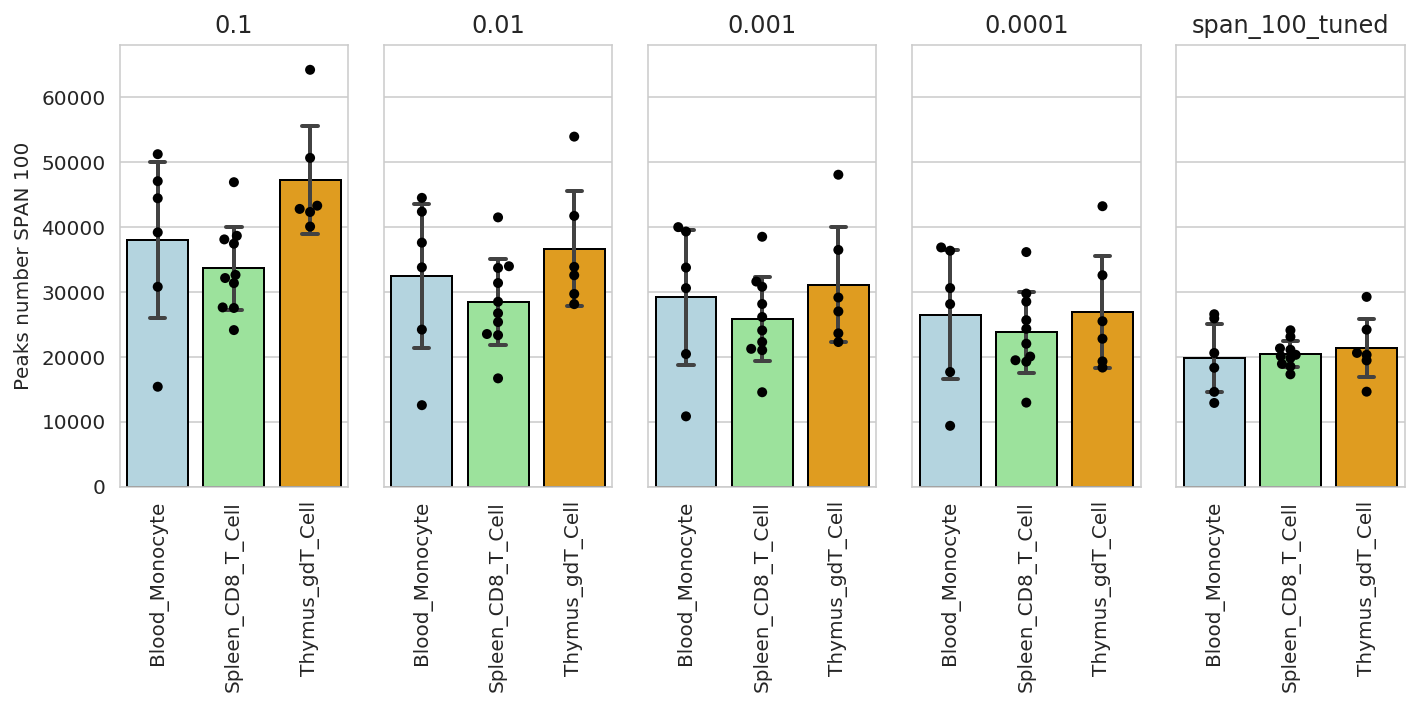

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


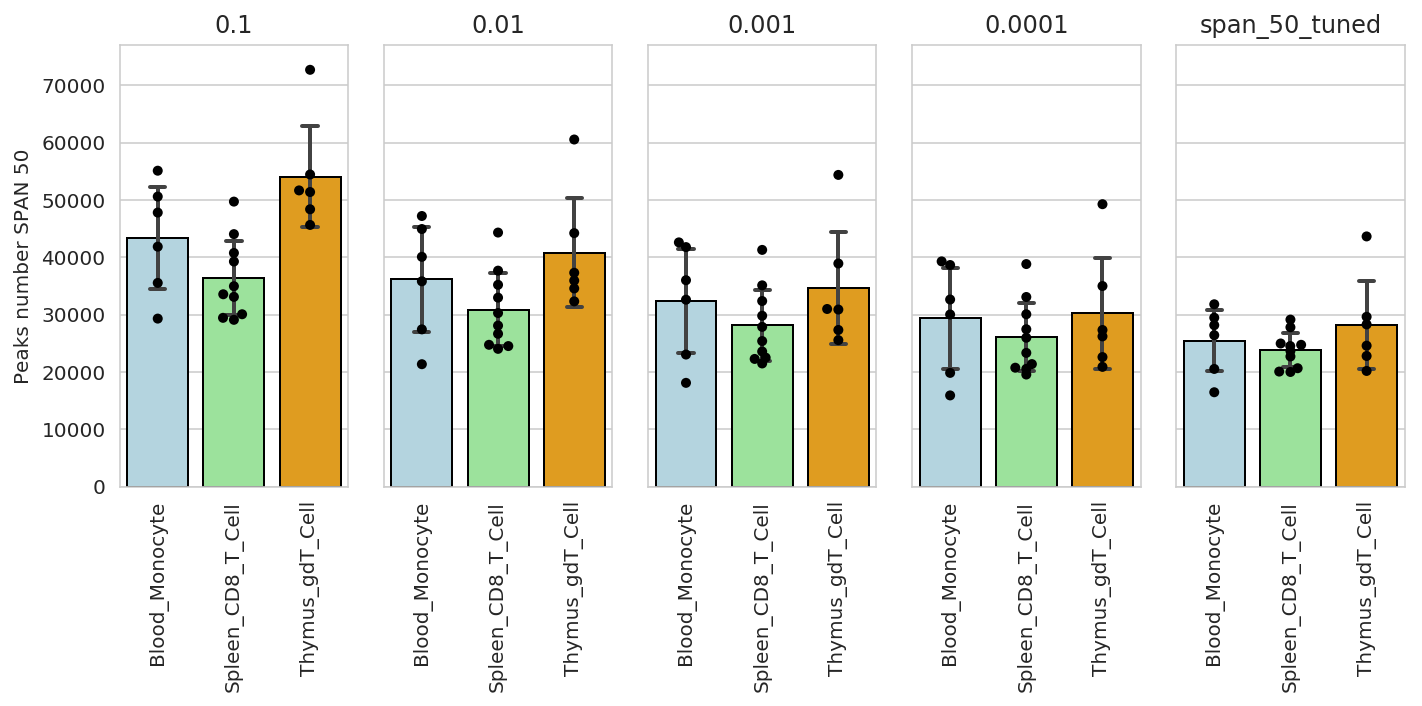

In [18]:
plot_peaks2(dfm, LEVELS, 'Peaks number MACS2')
plt.show()

plot_peaks2(pd.concat([dfs.loc[dfs['bin']==200], dfs200_tuned]), 
            FDRS + list(set(dfs200_tuned['level'])), 
            'Peaks number SPAN 200')
plt.show()

plot_peaks2(pd.concat([dfs.loc[dfs['bin']==100], dfs100_tuned]), 
            FDRS + list(set(dfs100_tuned['level'])), 
            'Peaks number SPAN 100')
plt.show()

plot_peaks2(pd.concat([dfs.loc[dfs['bin']==50], dfs50_tuned]), 
            FDRS + list(set(dfs50_tuned['level'])), 
            'Peaks number SPAN 50')
plt.show()

## Number of peaks for selected tools

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


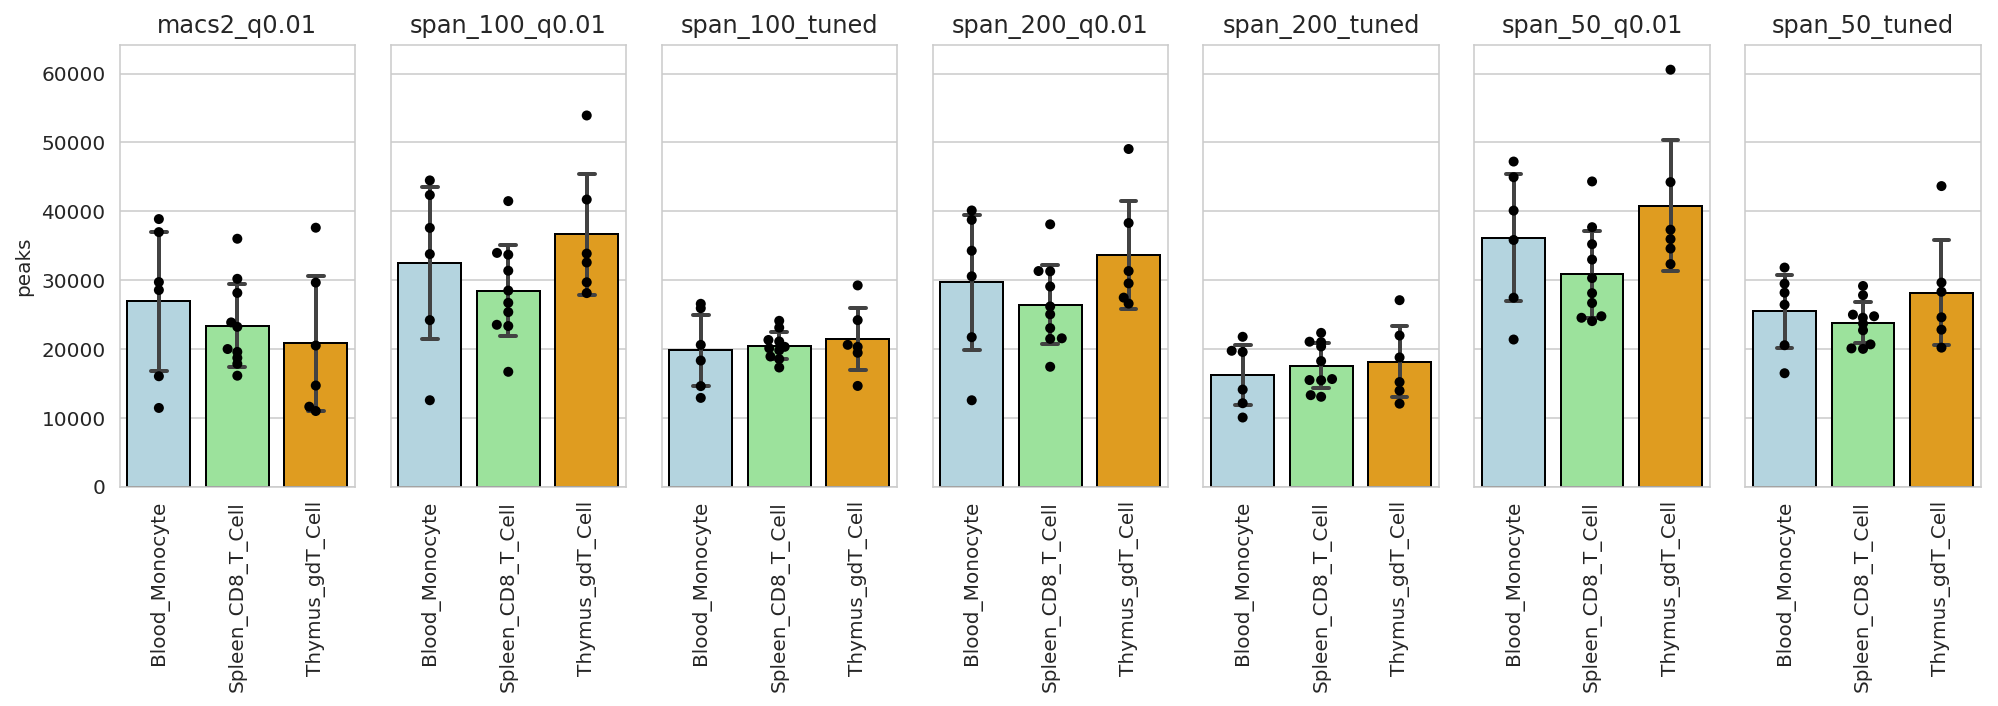

In [19]:
plot_peaks2(df_best, BEST_LEVELS, 'peaks')
plt.show()

## Overlaps

In [20]:
%%bash 
rm /tmp/overlap_*

In [21]:
def plot_overlaps2(df, levels, tool, title):
    # Create a copy for inplace modifications
    dfw = df.copy()
    # Column to identify all the possibilities
    dfw['ln'] = dfw['name'] + " " + [str(x) for x in dfw['level']]
    lns = len(set(dfw['ln']))
    axs = {}

    fig = plt.figure(figsize=(int(lns*0.75), 5))
    offset = 0
    for l in levels:
        data = dfw.loc[dfw['level'] == l]
        lnd = len(set(data['ln']))
        ax = plt.subplot2grid((1, lns), (0, offset), colspan=lnd)
        overlaps={}
        for n in NAMES:
            print('Processing', n, l)
            files = data.loc[data['name'] == n]['file']
            paths = [Path(f) for f in files]
            df_path = '/tmp/overlap_{}_{}_{}.tsv'.format(tool, n, l)
            overlaps[(n, l)] = bm.load_or_build_metrics_table(paths, paths, Path(df_path), jaccard=False)
        dfoverlap = pd.concat([overlap_with_name_level(overlaps, n,  l) for (n, l) in overlaps]).sort_values(by=['name'])        

        xlabels = []
        for n in dfoverlap['name']:
            if n not in xlabels:
                xlabels.append(n)

        sns.barplot(data=dfoverlap, 
                 x="name", y='overlap',
                 ci="sd", capsize=.2, errwidth=2,
                 palette=NAMES_PALETTE, 
                 edgecolor="black",
                 ax = ax)

        sns.swarmplot(data=dfoverlap,
              x="name", y='overlap',
              size=3,
              color='black',
              ax = ax)
        ax.legend().set_visible(False)
        axs[ax] = plt.ylim()
        if offset > 0:
            ax.get_yaxis().set_ticklabels([])
            ax.set_ylabel('')
        else:
            ax.set_ylabel(title)

        offset += lnd
        ax.set_xlabel('')
        ax.set_title(l)
        plt.xticks(range(0, len(xlabels)), xlabels, rotation=90)

    ymin = np.min([v[0] for v in axs.values()])
    ymax = np.max([v[1] for v in axs.values()])

    for ax in axs.keys():
        ax.set_ylim(bottom = ymin, top = ymax)
    plt.tight_layout()

Processing Thymus_gdT_Cell q0.1
Calculating metrics:  /tmp/overlap_macs2_Thymus_gdT_Cell_q0.1.tsv
  [Saved] /tmp/overlap_macs2_Thymus_gdT_Cell_q0.1.tsv
Processing Spleen_CD8_T_Cell q0.1
Calculating metrics:  /tmp/overlap_macs2_Spleen_CD8_T_Cell_q0.1.tsv
  [Saved] /tmp/overlap_macs2_Spleen_CD8_T_Cell_q0.1.tsv
Processing Blood_Monocyte q0.1
Calculating metrics:  /tmp/overlap_macs2_Blood_Monocyte_q0.1.tsv


No handles with labels found to put in legend.


  [Saved] /tmp/overlap_macs2_Blood_Monocyte_q0.1.tsv
Processing Thymus_gdT_Cell q0.01
Calculating metrics:  /tmp/overlap_macs2_Thymus_gdT_Cell_q0.01.tsv
  [Saved] /tmp/overlap_macs2_Thymus_gdT_Cell_q0.01.tsv
Processing Spleen_CD8_T_Cell q0.01
Calculating metrics:  /tmp/overlap_macs2_Spleen_CD8_T_Cell_q0.01.tsv
  [Saved] /tmp/overlap_macs2_Spleen_CD8_T_Cell_q0.01.tsv
Processing Blood_Monocyte q0.01
Calculating metrics:  /tmp/overlap_macs2_Blood_Monocyte_q0.01.tsv


No handles with labels found to put in legend.


  [Saved] /tmp/overlap_macs2_Blood_Monocyte_q0.01.tsv
Processing Thymus_gdT_Cell q0.001
Calculating metrics:  /tmp/overlap_macs2_Thymus_gdT_Cell_q0.001.tsv
  [Saved] /tmp/overlap_macs2_Thymus_gdT_Cell_q0.001.tsv
Processing Spleen_CD8_T_Cell q0.001
Calculating metrics:  /tmp/overlap_macs2_Spleen_CD8_T_Cell_q0.001.tsv
  [Saved] /tmp/overlap_macs2_Spleen_CD8_T_Cell_q0.001.tsv
Processing Blood_Monocyte q0.001
Calculating metrics:  /tmp/overlap_macs2_Blood_Monocyte_q0.001.tsv


No handles with labels found to put in legend.


  [Saved] /tmp/overlap_macs2_Blood_Monocyte_q0.001.tsv
Processing Thymus_gdT_Cell q0.0001
Calculating metrics:  /tmp/overlap_macs2_Thymus_gdT_Cell_q0.0001.tsv
  [Saved] /tmp/overlap_macs2_Thymus_gdT_Cell_q0.0001.tsv
Processing Spleen_CD8_T_Cell q0.0001
Calculating metrics:  /tmp/overlap_macs2_Spleen_CD8_T_Cell_q0.0001.tsv
  [Saved] /tmp/overlap_macs2_Spleen_CD8_T_Cell_q0.0001.tsv
Processing Blood_Monocyte q0.0001
Calculating metrics:  /tmp/overlap_macs2_Blood_Monocyte_q0.0001.tsv


No handles with labels found to put in legend.


  [Saved] /tmp/overlap_macs2_Blood_Monocyte_q0.0001.tsv


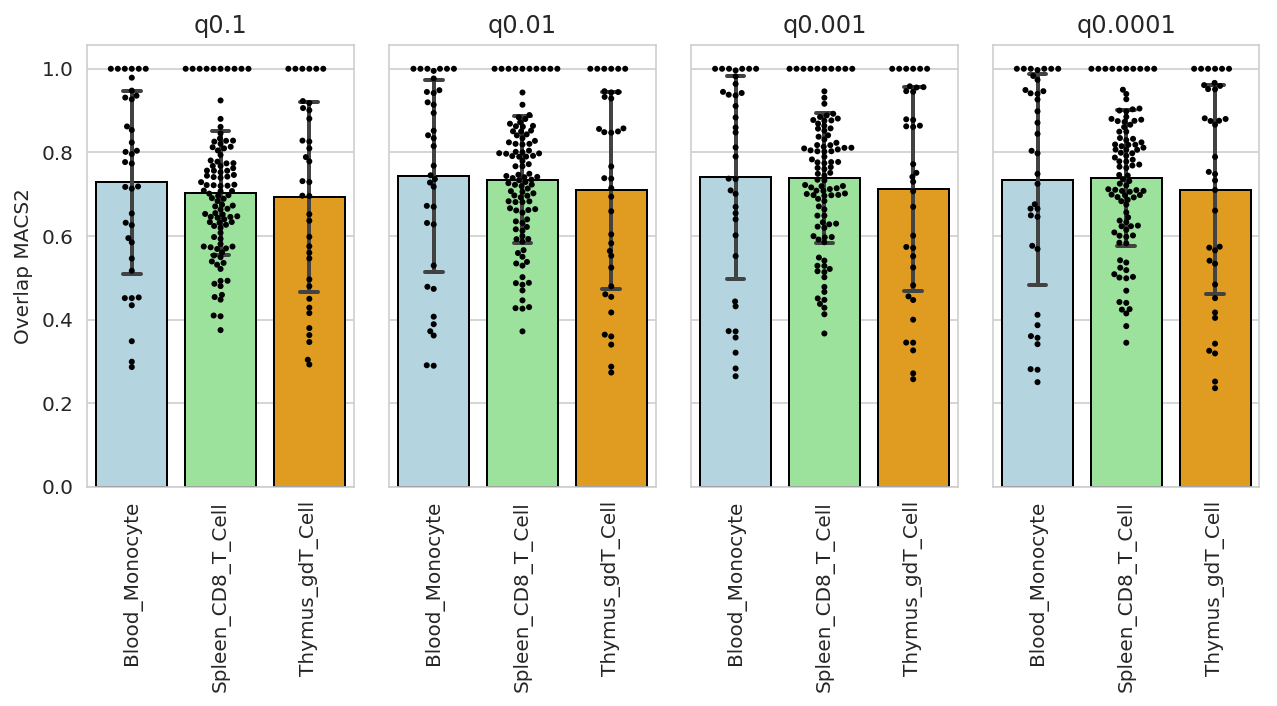

Processing Thymus_gdT_Cell 0.1
Calculating metrics:  /tmp/overlap_span_200_Thymus_gdT_Cell_0.1.tsv
  [Saved] /tmp/overlap_span_200_Thymus_gdT_Cell_0.1.tsv
Processing Spleen_CD8_T_Cell 0.1
Calculating metrics:  /tmp/overlap_span_200_Spleen_CD8_T_Cell_0.1.tsv
  [Saved] /tmp/overlap_span_200_Spleen_CD8_T_Cell_0.1.tsv
Processing Blood_Monocyte 0.1
Calculating metrics:  /tmp/overlap_span_200_Blood_Monocyte_0.1.tsv


No handles with labels found to put in legend.


  [Saved] /tmp/overlap_span_200_Blood_Monocyte_0.1.tsv
Processing Thymus_gdT_Cell 0.01
Calculating metrics:  /tmp/overlap_span_200_Thymus_gdT_Cell_0.01.tsv
  [Saved] /tmp/overlap_span_200_Thymus_gdT_Cell_0.01.tsv
Processing Spleen_CD8_T_Cell 0.01
Calculating metrics:  /tmp/overlap_span_200_Spleen_CD8_T_Cell_0.01.tsv
  [Saved] /tmp/overlap_span_200_Spleen_CD8_T_Cell_0.01.tsv
Processing Blood_Monocyte 0.01
Calculating metrics:  /tmp/overlap_span_200_Blood_Monocyte_0.01.tsv


No handles with labels found to put in legend.


  [Saved] /tmp/overlap_span_200_Blood_Monocyte_0.01.tsv
Processing Thymus_gdT_Cell 0.001
Calculating metrics:  /tmp/overlap_span_200_Thymus_gdT_Cell_0.001.tsv
  [Saved] /tmp/overlap_span_200_Thymus_gdT_Cell_0.001.tsv
Processing Spleen_CD8_T_Cell 0.001
Calculating metrics:  /tmp/overlap_span_200_Spleen_CD8_T_Cell_0.001.tsv
  [Saved] /tmp/overlap_span_200_Spleen_CD8_T_Cell_0.001.tsv
Processing Blood_Monocyte 0.001
Calculating metrics:  /tmp/overlap_span_200_Blood_Monocyte_0.001.tsv


No handles with labels found to put in legend.


  [Saved] /tmp/overlap_span_200_Blood_Monocyte_0.001.tsv
Processing Thymus_gdT_Cell 0.0001
Calculating metrics:  /tmp/overlap_span_200_Thymus_gdT_Cell_0.0001.tsv
  [Saved] /tmp/overlap_span_200_Thymus_gdT_Cell_0.0001.tsv
Processing Spleen_CD8_T_Cell 0.0001
Calculating metrics:  /tmp/overlap_span_200_Spleen_CD8_T_Cell_0.0001.tsv
  [Saved] /tmp/overlap_span_200_Spleen_CD8_T_Cell_0.0001.tsv
Processing Blood_Monocyte 0.0001
Calculating metrics:  /tmp/overlap_span_200_Blood_Monocyte_0.0001.tsv


No handles with labels found to put in legend.


  [Saved] /tmp/overlap_span_200_Blood_Monocyte_0.0001.tsv
Processing Thymus_gdT_Cell span_200_tuned
Calculating metrics:  /tmp/overlap_span_200_Thymus_gdT_Cell_span_200_tuned.tsv
  [Saved] /tmp/overlap_span_200_Thymus_gdT_Cell_span_200_tuned.tsv
Processing Spleen_CD8_T_Cell span_200_tuned
Calculating metrics:  /tmp/overlap_span_200_Spleen_CD8_T_Cell_span_200_tuned.tsv
  [Saved] /tmp/overlap_span_200_Spleen_CD8_T_Cell_span_200_tuned.tsv
Processing Blood_Monocyte span_200_tuned
Calculating metrics:  /tmp/overlap_span_200_Blood_Monocyte_span_200_tuned.tsv


No handles with labels found to put in legend.


  [Saved] /tmp/overlap_span_200_Blood_Monocyte_span_200_tuned.tsv


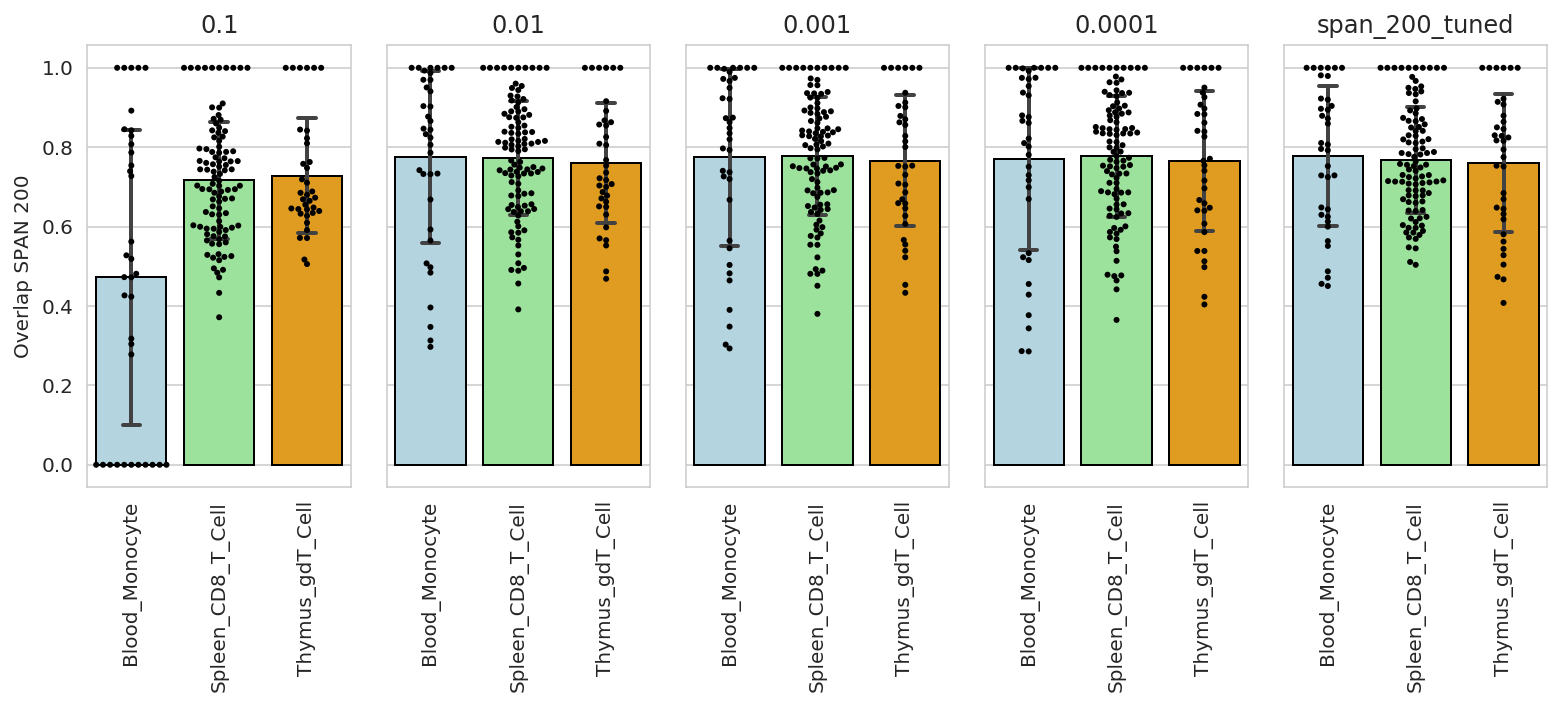

Processing Thymus_gdT_Cell 0.1
Calculating metrics:  /tmp/overlap_span_100_Thymus_gdT_Cell_0.1.tsv
  [Saved] /tmp/overlap_span_100_Thymus_gdT_Cell_0.1.tsv
Processing Spleen_CD8_T_Cell 0.1
Calculating metrics:  /tmp/overlap_span_100_Spleen_CD8_T_Cell_0.1.tsv
  [Saved] /tmp/overlap_span_100_Spleen_CD8_T_Cell_0.1.tsv
Processing Blood_Monocyte 0.1
Calculating metrics:  /tmp/overlap_span_100_Blood_Monocyte_0.1.tsv


No handles with labels found to put in legend.


  [Saved] /tmp/overlap_span_100_Blood_Monocyte_0.1.tsv
Processing Thymus_gdT_Cell 0.01
Calculating metrics:  /tmp/overlap_span_100_Thymus_gdT_Cell_0.01.tsv
  [Saved] /tmp/overlap_span_100_Thymus_gdT_Cell_0.01.tsv
Processing Spleen_CD8_T_Cell 0.01
Calculating metrics:  /tmp/overlap_span_100_Spleen_CD8_T_Cell_0.01.tsv
  [Saved] /tmp/overlap_span_100_Spleen_CD8_T_Cell_0.01.tsv
Processing Blood_Monocyte 0.01
Calculating metrics:  /tmp/overlap_span_100_Blood_Monocyte_0.01.tsv


No handles with labels found to put in legend.


  [Saved] /tmp/overlap_span_100_Blood_Monocyte_0.01.tsv
Processing Thymus_gdT_Cell 0.001
Calculating metrics:  /tmp/overlap_span_100_Thymus_gdT_Cell_0.001.tsv
  [Saved] /tmp/overlap_span_100_Thymus_gdT_Cell_0.001.tsv
Processing Spleen_CD8_T_Cell 0.001
Calculating metrics:  /tmp/overlap_span_100_Spleen_CD8_T_Cell_0.001.tsv
  [Saved] /tmp/overlap_span_100_Spleen_CD8_T_Cell_0.001.tsv
Processing Blood_Monocyte 0.001
Calculating metrics:  /tmp/overlap_span_100_Blood_Monocyte_0.001.tsv


No handles with labels found to put in legend.


  [Saved] /tmp/overlap_span_100_Blood_Monocyte_0.001.tsv
Processing Thymus_gdT_Cell 0.0001
Calculating metrics:  /tmp/overlap_span_100_Thymus_gdT_Cell_0.0001.tsv
  [Saved] /tmp/overlap_span_100_Thymus_gdT_Cell_0.0001.tsv
Processing Spleen_CD8_T_Cell 0.0001
Calculating metrics:  /tmp/overlap_span_100_Spleen_CD8_T_Cell_0.0001.tsv
  [Saved] /tmp/overlap_span_100_Spleen_CD8_T_Cell_0.0001.tsv
Processing Blood_Monocyte 0.0001
Calculating metrics:  /tmp/overlap_span_100_Blood_Monocyte_0.0001.tsv


No handles with labels found to put in legend.


  [Saved] /tmp/overlap_span_100_Blood_Monocyte_0.0001.tsv
Processing Thymus_gdT_Cell span_100_tuned
Calculating metrics:  /tmp/overlap_span_100_Thymus_gdT_Cell_span_100_tuned.tsv
  [Saved] /tmp/overlap_span_100_Thymus_gdT_Cell_span_100_tuned.tsv
Processing Spleen_CD8_T_Cell span_100_tuned
Calculating metrics:  /tmp/overlap_span_100_Spleen_CD8_T_Cell_span_100_tuned.tsv
  [Saved] /tmp/overlap_span_100_Spleen_CD8_T_Cell_span_100_tuned.tsv
Processing Blood_Monocyte span_100_tuned
Calculating metrics:  /tmp/overlap_span_100_Blood_Monocyte_span_100_tuned.tsv


No handles with labels found to put in legend.


  [Saved] /tmp/overlap_span_100_Blood_Monocyte_span_100_tuned.tsv


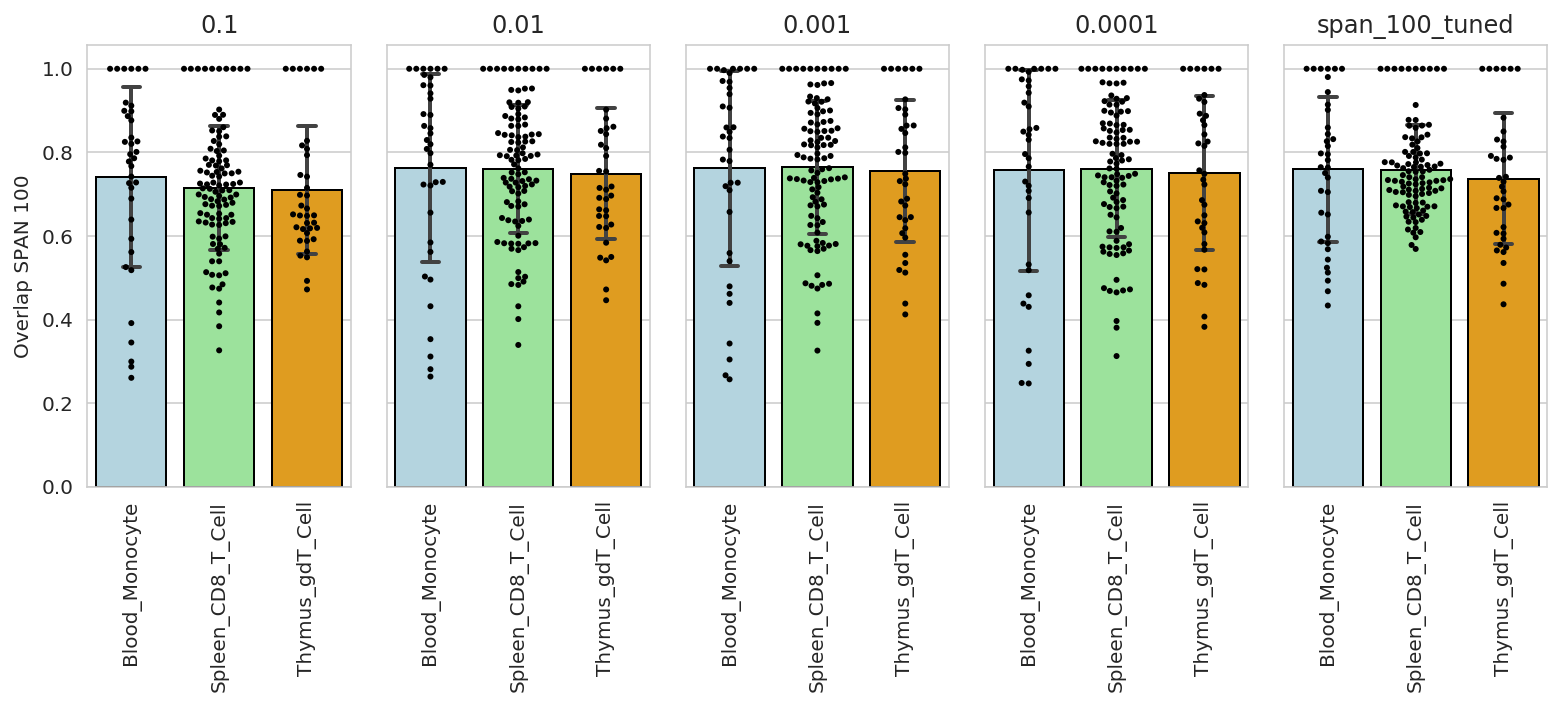

Processing Thymus_gdT_Cell 0.1
Calculating metrics:  /tmp/overlap_span_50_Thymus_gdT_Cell_0.1.tsv
  [Saved] /tmp/overlap_span_50_Thymus_gdT_Cell_0.1.tsv
Processing Spleen_CD8_T_Cell 0.1
Calculating metrics:  /tmp/overlap_span_50_Spleen_CD8_T_Cell_0.1.tsv
  [Saved] /tmp/overlap_span_50_Spleen_CD8_T_Cell_0.1.tsv
Processing Blood_Monocyte 0.1
Calculating metrics:  /tmp/overlap_span_50_Blood_Monocyte_0.1.tsv


No handles with labels found to put in legend.


  [Saved] /tmp/overlap_span_50_Blood_Monocyte_0.1.tsv
Processing Thymus_gdT_Cell 0.01
Calculating metrics:  /tmp/overlap_span_50_Thymus_gdT_Cell_0.01.tsv
  [Saved] /tmp/overlap_span_50_Thymus_gdT_Cell_0.01.tsv
Processing Spleen_CD8_T_Cell 0.01
Calculating metrics:  /tmp/overlap_span_50_Spleen_CD8_T_Cell_0.01.tsv
  [Saved] /tmp/overlap_span_50_Spleen_CD8_T_Cell_0.01.tsv
Processing Blood_Monocyte 0.01
Calculating metrics:  /tmp/overlap_span_50_Blood_Monocyte_0.01.tsv


No handles with labels found to put in legend.


  [Saved] /tmp/overlap_span_50_Blood_Monocyte_0.01.tsv
Processing Thymus_gdT_Cell 0.001
Calculating metrics:  /tmp/overlap_span_50_Thymus_gdT_Cell_0.001.tsv
  [Saved] /tmp/overlap_span_50_Thymus_gdT_Cell_0.001.tsv
Processing Spleen_CD8_T_Cell 0.001
Calculating metrics:  /tmp/overlap_span_50_Spleen_CD8_T_Cell_0.001.tsv
  [Saved] /tmp/overlap_span_50_Spleen_CD8_T_Cell_0.001.tsv
Processing Blood_Monocyte 0.001
Calculating metrics:  /tmp/overlap_span_50_Blood_Monocyte_0.001.tsv


No handles with labels found to put in legend.


  [Saved] /tmp/overlap_span_50_Blood_Monocyte_0.001.tsv
Processing Thymus_gdT_Cell 0.0001
Calculating metrics:  /tmp/overlap_span_50_Thymus_gdT_Cell_0.0001.tsv
  [Saved] /tmp/overlap_span_50_Thymus_gdT_Cell_0.0001.tsv
Processing Spleen_CD8_T_Cell 0.0001
Calculating metrics:  /tmp/overlap_span_50_Spleen_CD8_T_Cell_0.0001.tsv
  [Saved] /tmp/overlap_span_50_Spleen_CD8_T_Cell_0.0001.tsv
Processing Blood_Monocyte 0.0001
Calculating metrics:  /tmp/overlap_span_50_Blood_Monocyte_0.0001.tsv


No handles with labels found to put in legend.


  [Saved] /tmp/overlap_span_50_Blood_Monocyte_0.0001.tsv
Processing Thymus_gdT_Cell span_50_tuned
Calculating metrics:  /tmp/overlap_span_50_Thymus_gdT_Cell_span_50_tuned.tsv
  [Saved] /tmp/overlap_span_50_Thymus_gdT_Cell_span_50_tuned.tsv
Processing Spleen_CD8_T_Cell span_50_tuned
Calculating metrics:  /tmp/overlap_span_50_Spleen_CD8_T_Cell_span_50_tuned.tsv
  [Saved] /tmp/overlap_span_50_Spleen_CD8_T_Cell_span_50_tuned.tsv
Processing Blood_Monocyte span_50_tuned
Calculating metrics:  /tmp/overlap_span_50_Blood_Monocyte_span_50_tuned.tsv


No handles with labels found to put in legend.


  [Saved] /tmp/overlap_span_50_Blood_Monocyte_span_50_tuned.tsv


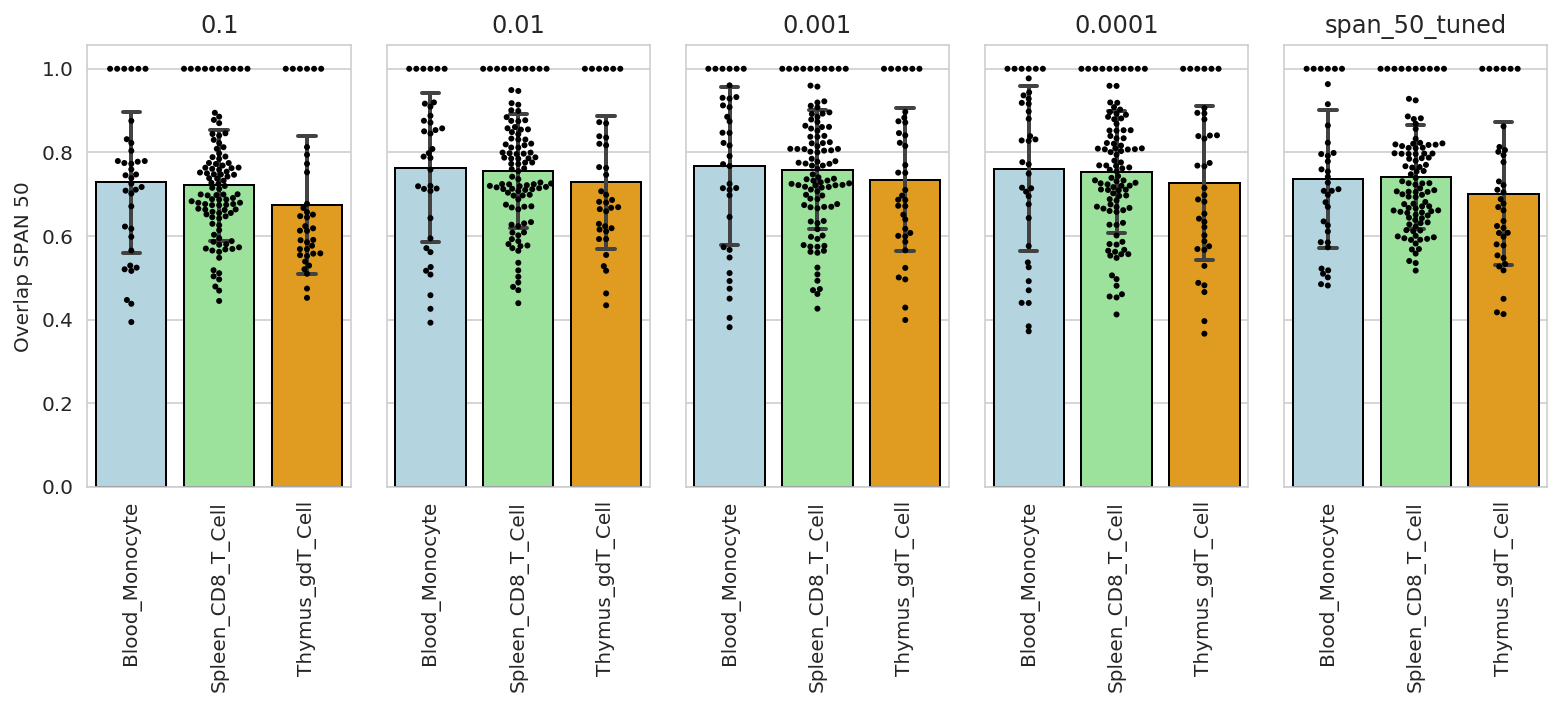

In [22]:
plot_overlaps2(dfm,  LEVELS, 'macs2', 'Overlap MACS2')
plt.show()

plot_overlaps2(pd.concat([dfs.loc[dfs['bin']==200], dfs200_tuned]), 
            FDRS + list(set(dfs200_tuned['level'])), 
            'span_200', 'Overlap SPAN 200')
plt.show()


plot_overlaps2(pd.concat([dfs.loc[dfs['bin']==100], dfs100_tuned]), 
            FDRS + list(set(dfs100_tuned['level'])), 
            'span_100', 'Overlap SPAN 100')
plt.show()

plot_overlaps2(pd.concat([dfs.loc[dfs['bin']==50], dfs50_tuned]), 
            FDRS + list(set(dfs50_tuned['level'])), 
            'span_50', 'Overlap SPAN 50')
plt.show()

## Overlaps  for selected tools

Processing Thymus_gdT_Cell macs2_q0.01
Calculating metrics:  /tmp/overlap_best_Thymus_gdT_Cell_macs2_q0.01.tsv
  [Saved] /tmp/overlap_best_Thymus_gdT_Cell_macs2_q0.01.tsv
Processing Spleen_CD8_T_Cell macs2_q0.01
Calculating metrics:  /tmp/overlap_best_Spleen_CD8_T_Cell_macs2_q0.01.tsv
  [Saved] /tmp/overlap_best_Spleen_CD8_T_Cell_macs2_q0.01.tsv
Processing Blood_Monocyte macs2_q0.01
Calculating metrics:  /tmp/overlap_best_Blood_Monocyte_macs2_q0.01.tsv


No handles with labels found to put in legend.


  [Saved] /tmp/overlap_best_Blood_Monocyte_macs2_q0.01.tsv
Processing Thymus_gdT_Cell span_100_q0.01
Calculating metrics:  /tmp/overlap_best_Thymus_gdT_Cell_span_100_q0.01.tsv
  [Saved] /tmp/overlap_best_Thymus_gdT_Cell_span_100_q0.01.tsv
Processing Spleen_CD8_T_Cell span_100_q0.01
Calculating metrics:  /tmp/overlap_best_Spleen_CD8_T_Cell_span_100_q0.01.tsv
  [Saved] /tmp/overlap_best_Spleen_CD8_T_Cell_span_100_q0.01.tsv
Processing Blood_Monocyte span_100_q0.01
Calculating metrics:  /tmp/overlap_best_Blood_Monocyte_span_100_q0.01.tsv


No handles with labels found to put in legend.


  [Saved] /tmp/overlap_best_Blood_Monocyte_span_100_q0.01.tsv
Processing Thymus_gdT_Cell span_100_tuned
Calculating metrics:  /tmp/overlap_best_Thymus_gdT_Cell_span_100_tuned.tsv
  [Saved] /tmp/overlap_best_Thymus_gdT_Cell_span_100_tuned.tsv
Processing Spleen_CD8_T_Cell span_100_tuned
Calculating metrics:  /tmp/overlap_best_Spleen_CD8_T_Cell_span_100_tuned.tsv
  [Saved] /tmp/overlap_best_Spleen_CD8_T_Cell_span_100_tuned.tsv
Processing Blood_Monocyte span_100_tuned
Calculating metrics:  /tmp/overlap_best_Blood_Monocyte_span_100_tuned.tsv


No handles with labels found to put in legend.


  [Saved] /tmp/overlap_best_Blood_Monocyte_span_100_tuned.tsv
Processing Thymus_gdT_Cell span_200_q0.01
Calculating metrics:  /tmp/overlap_best_Thymus_gdT_Cell_span_200_q0.01.tsv
  [Saved] /tmp/overlap_best_Thymus_gdT_Cell_span_200_q0.01.tsv
Processing Spleen_CD8_T_Cell span_200_q0.01
Calculating metrics:  /tmp/overlap_best_Spleen_CD8_T_Cell_span_200_q0.01.tsv
  [Saved] /tmp/overlap_best_Spleen_CD8_T_Cell_span_200_q0.01.tsv
Processing Blood_Monocyte span_200_q0.01
Calculating metrics:  /tmp/overlap_best_Blood_Monocyte_span_200_q0.01.tsv


No handles with labels found to put in legend.


  [Saved] /tmp/overlap_best_Blood_Monocyte_span_200_q0.01.tsv
Processing Thymus_gdT_Cell span_200_tuned
Calculating metrics:  /tmp/overlap_best_Thymus_gdT_Cell_span_200_tuned.tsv
  [Saved] /tmp/overlap_best_Thymus_gdT_Cell_span_200_tuned.tsv
Processing Spleen_CD8_T_Cell span_200_tuned
Calculating metrics:  /tmp/overlap_best_Spleen_CD8_T_Cell_span_200_tuned.tsv
  [Saved] /tmp/overlap_best_Spleen_CD8_T_Cell_span_200_tuned.tsv
Processing Blood_Monocyte span_200_tuned
Calculating metrics:  /tmp/overlap_best_Blood_Monocyte_span_200_tuned.tsv


No handles with labels found to put in legend.


  [Saved] /tmp/overlap_best_Blood_Monocyte_span_200_tuned.tsv
Processing Thymus_gdT_Cell span_50_q0.01
Calculating metrics:  /tmp/overlap_best_Thymus_gdT_Cell_span_50_q0.01.tsv
  [Saved] /tmp/overlap_best_Thymus_gdT_Cell_span_50_q0.01.tsv
Processing Spleen_CD8_T_Cell span_50_q0.01
Calculating metrics:  /tmp/overlap_best_Spleen_CD8_T_Cell_span_50_q0.01.tsv
  [Saved] /tmp/overlap_best_Spleen_CD8_T_Cell_span_50_q0.01.tsv
Processing Blood_Monocyte span_50_q0.01
Calculating metrics:  /tmp/overlap_best_Blood_Monocyte_span_50_q0.01.tsv


No handles with labels found to put in legend.


  [Saved] /tmp/overlap_best_Blood_Monocyte_span_50_q0.01.tsv
Processing Thymus_gdT_Cell span_50_tuned
Calculating metrics:  /tmp/overlap_best_Thymus_gdT_Cell_span_50_tuned.tsv
  [Saved] /tmp/overlap_best_Thymus_gdT_Cell_span_50_tuned.tsv
Processing Spleen_CD8_T_Cell span_50_tuned
Calculating metrics:  /tmp/overlap_best_Spleen_CD8_T_Cell_span_50_tuned.tsv
  [Saved] /tmp/overlap_best_Spleen_CD8_T_Cell_span_50_tuned.tsv
Processing Blood_Monocyte span_50_tuned
Calculating metrics:  /tmp/overlap_best_Blood_Monocyte_span_50_tuned.tsv


No handles with labels found to put in legend.


  [Saved] /tmp/overlap_best_Blood_Monocyte_span_50_tuned.tsv


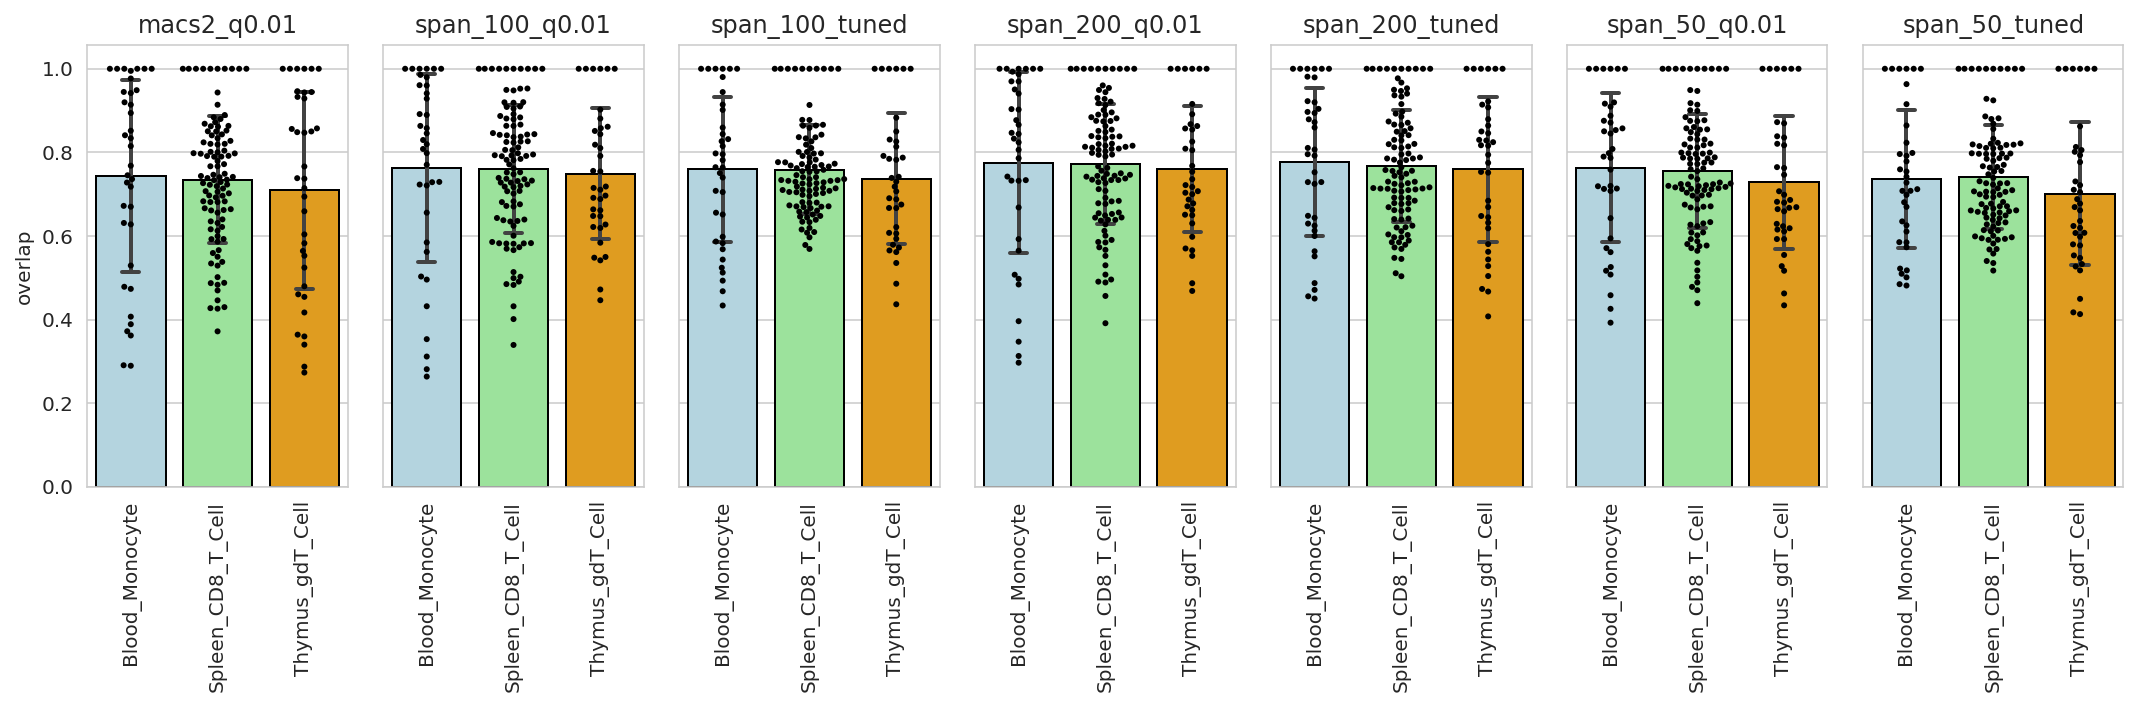

In [23]:
plot_overlaps2(df_best, BEST_LEVELS, 'best', 'overlap')
plt.show()